# Изучение рынка заведений общественного питания Москвы
- Автор: Смирнова Анастасия
- Дата: 01.02.2025

### Цели и задачи проекта

<font color='#777778'>**Цель проекта** - провести исследовательский анализ рынка заведений общественного питания Москвы, который поможет принять решение о наиболее удачном месторасположении для нового заведения.

<font color='#777778'>Задачи проекта:

- Ознакомиться с данными и подготовить их к исследованию;
- Произвести обработку данных: очистить их дубликатов, обработать пропуски, преобразовать типы данных при необходимости, добавить промежуточные столбцы, необходимые для дальнейшей работы;
- Провести исследовательский анализ данных ответив на следующие вопросы:</font>

1. Какие категории заведений представлены в данных?
2. Какие административные районы Москвы присутствуют в данных?
3. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми?
4. Какое количество посадочных мест характерно для различных типов заведений общественного питания?
5. Какое распределение усредненных значений рейтинга харатерно для различных типов заведений общественного питания?
6. С какими данными показывают самую сильную корреляцию рейтинги заведений?
7. Какие заведения входят топ-15, и какими характеристиками они обладают?

- Сделать итоговый вывод по результатам исследования и дать рекоммендации потенциальным инвесторам по выбору месторасположения для будущего заведения. </font>

### Описание данных

<font color='#777778'>Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:

- `id` - идентификатор заведения;
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
`0` — заведение не является сетевым;
`1` — заведение является сетевым.
seats — количество посадочных мест;
- `seats` — количество посадочных мест.</font>

<font color='#777778'>Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:

- `id` - идентификатор заведения;
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:</font>

<font color='#777778'>«Средний счёт: 1000–1500 ₽»;

<font color='#777778'>«Цена чашки капучино: 130–220 ₽»;

<font color='#777778'>«Цена бокала пива: 400–600 ₽».

и так далее;</font>
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.</font>

### Содержимое проекта

<font color='#777778'>

- Загрузка данных и их предобработка
- Предобработка данных;
- Исследовательский анализ данных;
- Итоговый вывод и рекоммендации</font>

---

## 1. Загрузка данных и знакомство с ними

<font color='#777778'>Начнем с загрузки библиотек и данных о заведениях общественного питания Москвы, хранящихся в датасетах `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
# Импортируем библиотеки
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np

#Загружаем бибилиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

#Загружаем библиотеку для расета коэфициента корреляции phik
!pip install phik
from phik import phik_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 5.4 MB/s eta 0:00:00


In [2]:
# Выгружаем данные в переменные rest_info и rest_price
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

<font color='#777778'>Познакомимся с данными при помощи методов `head()` и `info()`

In [3]:
#Выводим первые строки датафрейма rest_info
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
#Выводим информацию о датафрейме rest_info
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


<font color='#777778'> Датафрейм `rest_info` состоит из 9 столбцов и 8 406 строк. В описании к данным отсутствует столбец `id`, который по всей видимости представляет собой уникальный код каждого заведения в таблице и может выступать в роли первичного ключа при объединении датафреймов. Дополним описание данных данным столбцом. В остальном названия столбцов соответствуют заявленным в описании к данным и не требуют дополнительного преобразования к стилю snake case.

<font color='#777778'> Данные представлены типами `object`, `int64` и `float64`. Типы данных для столбцов подобраны корректно за исключением столбца `seats`. Логичнее представить количество посадочных мест целочисленным числом `int64`. Однако такое представление в виде числа `float64` связано с наличием пропусков. Изменим тип данных на `Int64` с возможность оставления пропусков, а также выполним понижение разрядности. Понижение разрядности также можем применить к столбцу `chain`.

<font color='#777778'> Пропуски содержатся в столбце `hours`, содержащем данные о часах работы заведений, а также в столбце `seats`, содержащем данные о количестве посадочных мест. Далее изучим природу пропусков детально для принятия решения об их обработке.

In [5]:
#Выводим первые строки датафрейма rest_price
rest_price.head()


,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
#Выводим информацию о датафрейме rest_price
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


<font color='#777778'> Датафрейм `rest_price` содержит 5 столбцов и 4058 строк. В описании к данным отсутствует столбец `id`, который по всей видимости является первичным ключом датафрейма `rest_price`. Дополним описании данных данным столбцов. В остальном названия столбцов соответствуют заявленным в описании к данным, преобразования к snake case не требуется.

<font color='#777778'> Данные представлены типами `object` и `float64`. Типы данных в столбцах корректны и не требуют дополнительного преобразования.

<font color='#777778'> Пропуски содержатся в столбцах `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`. Далее изучим пропуски детально для принятия решения о способе их обработки.

<font color='#777778'>После первичного анализа данных можно отметить, что датафреймы `rest_info` и `rest_price` имеют разный размер. Датафрейм `rest_price` примерно вдвое меньше, чем датафрейм `rest_info`.

<font color='#777778'>Типы данных выбраны корректно, однако к числовым данным можно применить понижение разрядности. В обоих датафреймах присутствуют пропуски, требующие детального изучения.

### Подготовка единого датафрейма

<font color='#777778'> Поскольку датафреймы `rest_info` и `rest_price` разных размеров, выполнять присоединиение нужно при помощи **left join** для того, чтобы сохранить все данные из датафейма `rest_info`, а не только те, для которых нашлось соответствие в `rest_price`. В противном случае, мы не сможем корректно рассчитать статистику по количеству различных типов заведений, административным округам, соотношению сетевых и несетевых заведений.
Таким образом, к датафрейму `rest_info` мы будем присоединять датафрейм `rest_price`. Соединять будем по id заведения, используя значение параметра `how = 'left'`.

In [7]:
#Выполняем объединение датафреймов rest_info и rest_price при помощи merge
merged_df = pd.merge(rest_info, rest_price, on = 'id', how = 'left')

In [8]:
#Выводим информацию об объединённом датафрейме
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


<font color='#777778'> В результате объединения получили датафрейм `merged_df`, содержащий все строки из исходных датафреймов `rest_info` и `rest_price`. Новый датафрейм содержит 13 столбцов и 8 406 строк. Информация обо всех заведениях сохранена.

<font color='#777778'>Можно приступать к предобработке данных.

## 2. Предобработка данных

<font color='#777778'> Выполним оптимизацию типа данных в столбцах `chain` при помощи `pd.numeric()` с указанием `downcast = 'integer'`.

In [9]:
#Преобразуем тип данных в столбце seats к целочисленному
merged_df['seats'] = merged_df['seats'].astype('Int64')

#Оптимизируем тип данных в столбце seats
merged_df['chain'] = pd.to_numeric(merged_df['chain'],downcast = 'integer')

In [10]:
#Проверяем типы данных после преобразования
merged_df.dtypes

,0
id,object
name,object
category,object
address,object
district,object
hours,object
rating,float64
chain,int8
seats,Int64
price,object


<font color='#777778'> Преобразование выполнено успешно.

<font color='#777778'> Изучим пропущенные значения в датафрейме `merged_df`. Рассчитаем их количество в относительном и абсолютном выражении. Для этого можно использовать метод `isna()` в сочетании с `sum()`.

In [11]:
#Рассчитываем количество пропусков в датафрейме merged_df
empty_values = pd.DataFrame(merged_df.isna().sum())

#Рассчитываем долю пропусков
empty_values['share'] = round(merged_df.isna().sum() / merged_df.shape[0] * 100, 2)

In [12]:
#Отбираем только те резульататы, где доля пропусков больше 0.
empty_values = empty_values[(empty_values['share'] > 0)]

In [13]:
#Сортируем результат по убыванию и применяем форматирование
print('Пропущенные значения в датафрейме merged_df:')
empty_values.sort_values(by = 'share',ascending = False).style.background_gradient(cmap='YlOrRd', axis=0, subset = 'share')

Пропущенные значения в датафрейме merged_df:


,0,share
middle_coffee_cup,7871,93.640000
middle_avg_bill,5257,62.540000
price,5091,60.560000
avg_bill,4590,54.600000
seats,3611,42.960000
hours,536,6.380000


<font color='#777778'> В датафрейме `merged_df` содержатся пропуски:

- `middle_coffee_cup` - 93,64% пропущенных значений. Примерно половина значений в данном столбце пропущена, поскольку для многих заведений из `rest_info` не нашлось соответствия в датафрейме `rest_price`. Оставшаяся часть пропусков скорее всего связана с тем, что заведение либо не является кофейней, либо, что строка `avg_bill` не начинается с подстроки `Цена одной чашки каппучино:`;
- `middle_avg_bill` - 62,54% пропущенных значений. Аналогично столбцу `middle_coffee_cup` появление пропусков может быть связано с отсутствием некоторых заведений в `rest_price`, а также с тем, что значение в столбце `avg_bill` не начинается с подстроки `Средний счёт:`;
- `price` - 60,56% пропущенных значений. Если заполнение данных в столбце `price` основано на извлечении данных из столбца `avg_bill`, то можно предположить, что пропуски появились в тех строках, где значение `avg_bill` отсутствует. Еще часть пропусков образовалась в результате объединения датафреймов `rest_info` и `rest_price`;
- `avg_bill` - 54,6% пропущенных значений. Появление  большей части пропусков связано с объединением датафреймов `rest_price` и `rest_info`, а оставшаяся часть пропусков могла возникнуть из-за технической ошибки, либо, из-за того, что владельцы заведения не указали информацию;
- `seats` - 42,96% пропущенных значений. Возможно появление пропусков свяазано с тем, что некоторые заведения не предполагают наличие посадочных мест. Дальнейшее изучение пропусков покажет возможную причину их возникновения;
- `hours` - 6,38% пропущенных значений. Так как количество пропусков невелико можно предположить, что на их появление повлиял человеческий фактор и владельцы некоторых заведений не указали информацию о часах работы. </font>

<font color='#777778'> Изучим пропуски в столбце **`middle_coffee_cup`**. Для начала оценим состав пропусков в изначальном датафрейме `rest_price`. Для этого создадим срез значений с пропусками в столбце `middle_coffee_cup` и оценим распределение значений в строках `avg_bill`: какое количество значений пропущено, а какое количество значений не содержит подстроку `Цена одной чашки каппучино`. Далее найдем разность между количеством пропусков в полученном датафрейме `merged_df` и количеством пропущенных значений `rest_price`. Таким образом, мы сможем найти количество пропусков, которое образовалось в результате присоединения датафреймов `rest_price` и `rest_info`.

In [14]:
#Делаем срез заведений с пропусками в столбце middle_coffee_cup и находим количество строк
middle_coffee_cup_missed_values = rest_price[(rest_price['middle_coffee_cup'].isna() == True)].copy()
print(f'Количество пропущенных значений в столбце middle_coffee_cup: {middle_coffee_cup_missed_values.shape[0]}')

Количество пропущенных значений в столбце middle_coffee_cup: 3523


<font color='#777778'> Для того, чтобы оценить, какие значения представлены в столбце `avg_bill`, создадим столбец `indicator`. Далее при помощи `value_counts()` подсчитаем количество каждого значения и при помощи `isna().sum()` вычислим количество пропусков.

In [15]:
#Создадим новый столбец indicator и найдем, какие значения представлены в столбце
middle_coffee_cup_missed_values['indicator'] = middle_coffee_cup_missed_values['avg_bill'].str[0:12]
print('Распределение уникальных значений в столбце "Indicator":')
middle_coffee_cup_missed_values['indicator'].value_counts()

Распределение уникальных значений в столбце "Indicator":


,count
indicator,
Средний счёт,3149
Цена бокала,132


In [16]:
#Находим количество пропущенных значений в столбце avg_bill
missed_values = middle_coffee_cup_missed_values['indicator'].isna().sum()
print(f'Количество пропущенных значений в столбце avg_bill: {missed_values}')

Количество пропущенных значений в столбце avg_bill: 242


In [17]:
#Находим, какое количество пропусков образовалось в результате соединения датафреймов `rest_info` и `rest_price`.
missed_after_merging = merged_df['middle_coffee_cup'].isna().sum() - rest_price['middle_coffee_cup'].isna().sum()
print(f'Количество пропущенных значений в столбце middle_coffee_cup, образовавшееся в результате соединения датафреймов rest_info и rest_price: {missed_after_merging}')

Количество пропущенных значений в столбце middle_coffee_cup, образовавшееся в результате соединения датафреймов rest_info и rest_price: 4348


<font color='#777778'> Таким образом, в исходном датафрейме `rest_price` содержится 3523 пропущенных значений в столбце `middle_coffee_cup.` 242 пропуска возникли в связи с тем, что значение `avg_bill` было не заполнено, а еще 3 281 пропусков появилось в резульатате отсутствия вхождения подстроки "Цена одной чашки капучино" в столбце `avg_bill`. Далее в результате соединения датафреймов `rest_info` и `rest_price` образовалась большая часть пропусков - 4 348 значений. Поскольку данный столбец при дальнейших расчетах использоваться не будут, можем оставить пропуски без изменения.

<font color='#777778'>Изучим пропуски в столбце **`middle_avg_bill`**. При анализе
пропусков можно применить ту же логику, что и при анализе пропусков в столбце `middle_coffee_cup`. Таким образом мы можем выяснить, какое количество пропусков образовалось в результате пропущенных значений и отстутствия вхождений подстроки `Средний чек:` в столбце `avg_bill` в исходном датафрейме `rest_price`, а также какое количество пропусков возникло при последующем соединении датафреймов `rest_info` и `rest_price`.

In [18]:
#Делаем срез заведений с пропусками в столбце middle_coffee_cup и находим количество строк
middle_avg_bill_missed_values = rest_price[(rest_price['middle_avg_bill'].isna() == True)].copy()
print(f'Количество пропущенных значений в столбце middle_avg_bill: {middle_avg_bill_missed_values.shape[0]}')

Количество пропущенных значений в столбце middle_avg_bill: 909


<font color='#777778'> Для того, чтобы оценить, какие значения представлены в столбце `avg_bill`, создадим столбец `indicator`. Далее при помощи `value_counts()` подсчитаем количество каждого значения и при помощи `isna().sum()` вычислим количество пропусков.

In [19]:
#Создадим новый столбец indicator и найдем, какие значения представлены в столбце
middle_avg_bill_missed_values['indicator'] = middle_avg_bill_missed_values['avg_bill'].str[0:16]
print('Распределение уникальных значений в столбце "Indicator":')
middle_avg_bill_missed_values['indicator'].value_counts()

Распределение уникальных значений в столбце "Indicator":


,count
indicator,
Цена чашки капуч,535
Цена бокала пива,132


In [20]:
#Находим количество пропущенных значений в столбце avg_bill
missed_values_avg_bill = middle_avg_bill_missed_values['indicator'].isna().sum()
print(f'Количество пропущенных значений в столбце avg_bill: {missed_values_avg_bill}')

Количество пропущенных значений в столбце avg_bill: 242


In [21]:
#Находим, какое количество пропусков образовалось в результате соединения датафреймов `rest_info` и `rest_price`.
missed_after_merging = merged_df['middle_avg_bill'].isna().sum() - rest_price['middle_avg_bill'].isna().sum()
print(f'Количество пропущенных значений в столбце middle_avg_bill, образовавшееся в результате соединения датафреймов rest_info и rest_price: {missed_after_merging}')

Количество пропущенных значений в столбце middle_avg_bill, образовавшееся в результате соединения датафреймов rest_info и rest_price: 4348


<font color='#777778'> Таким образом, в исходном датафрейме `rest_price` содержится 909 пропущенных значений в столбце `middle_avg_bill.` 242 пропуска возникли в связи с тем, что значение `avg_bill` было не заполнено, а еще 667 пропусков появилось в резульатате отсутствия вхождения подстроки "Средний счет
" в столбце `avg_bill`. Далее в результате соединения датафреймов `rest_info` и `rest_price` образовалась большая часть пропусков - 4 348 значений. Примечательно, что большая часть пропущенных значений образовалась как раз в результате присоединения датафреймов `rest_info` и `rest_price`.

<font color='#777778'>Поскольку данный столбец понадобится при изучении вариации среднего чека заведения в зависимости от района Москвы, оставим пропуски в данном столбце без изменений.

<font color='#777778'> Рассмотрим пропуски в столбце `price`. Аналогично расчетам по пропускам в `middle_coffee_cup` и `middle_avg_bill`, рассчитаем количество пропущенных значений в исходном датафрейме `rest_price` и количество пропусков, которое появилось при последующем объединении датафреймов `rest_price` и `rest_info`.

In [22]:
#Делаем срез заведений с пропусками в столбце price и находим количество строк
price_missed_values = rest_price[(rest_price['price'].isna() == True)].copy()
print(f'Количество пропущенных значений в столбце price: {price_missed_values.shape[0]}')

Количество пропущенных значений в столбце price: 743


<font color='#777778'> Из расчетов по пропускам в столбцах `middle_coffee_cup` и `middle_avg_bill` известно, что количество пропусков в столбце `avg_bill` составляет 242. Это значение меньше, чем количество пропусков в столбце `price`. Гипотеза о том, что заполнение значение столбца `price` происходит на основании значений столбца `avg_bill` оказалась неверной.

In [23]:
#Находим, какое количество пропусков образовалось в результате соединения датафреймов `rest_info` и `rest_price`.
missed_after_merging = merged_df['price'].isna().sum() - rest_price['price'].isna().sum()
print(f'Количество пропущенных значений в столбце price, образовавшееся в результате соединения датафреймов rest_info и rest_price: {missed_after_merging}')

Количество пропущенных значений в столбце price, образовавшееся в результате соединения датафреймов rest_info и rest_price: 4348


<font color='#777778'>Таким образом, большая часть пропусков в столбце `price` появилась в результате объединения датафреймов `rest_price` и `rest_info`. Незначительная часть пропусков, которая присутствовала в исходном датафрейме `rest_price` не показала взаимосвязи со пропущенными значениями в столбце `avg_bill`, поэтому появление этих пропусков можно списать на техническую ошибку при присвоении категории `price`. Так как данный столбец в будущих расчётах не участвует, оставим пропуски без изменений.

<font color='#777778'> Изучим пропуски в стобце **`seats`**. Для этого создадим срез заведений с пропущенными значениями в данном столбце, сгруппируем данные по категории заведения и построим столбчатую диаграмму, которая покажет распределение заведений, для которых отсутствует информация о количестве посадочных мест в зависимости от их категории. Возможно появление пропусков неслучайно и связано с тем, что концепция заведения не предполагает наличия посадочных мест.

In [24]:
#Создаем срез датафрейма с пропущенными значениями в seats
missed_values_seats = merged_df[(merged_df['seats'].isna() == True)].copy()

In [25]:
#Групппируем данные по категории заведения
missed_values_seats = missed_values_seats.groupby('category')['id'].count().sort_values(ascending = False)

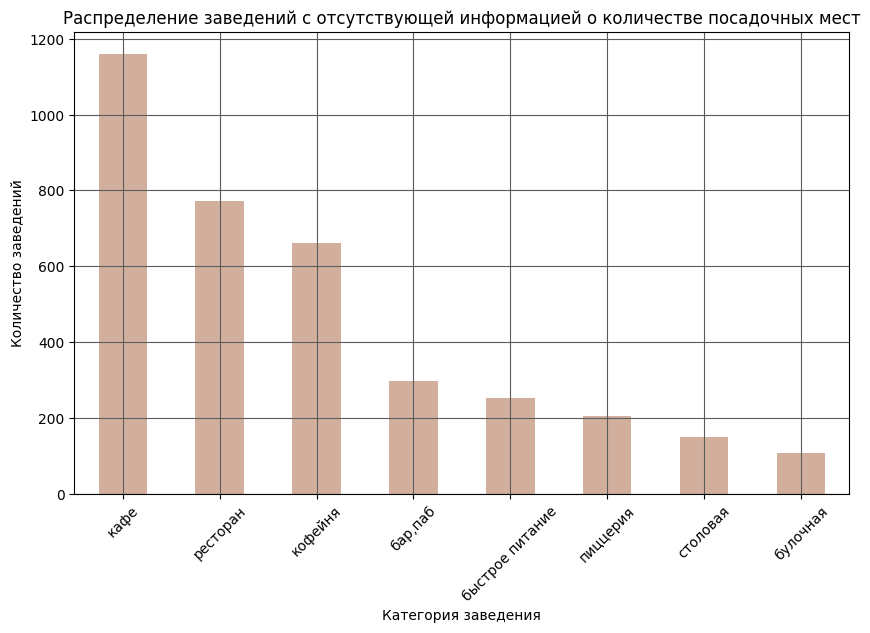

In [26]:
#Строим столбчатую диаграмму
missed_values_seats.plot(kind  = 'bar',
        title = 'Распределение заведений с отсутствующей информацией о количестве посадочных мест',
        xlabel = "Категория заведения",
        ylabel = 'Количество заведений',
        legend = False,
        rot = 45,
        color = '#d2af9d',
        figsize = (10,6)
        )
#добавляем сетку
plt.grid(color = '#5b5b5b')

#отображаем график
plt.show()

<font color='#777778'> Из распределения видно, что информация о количестве посадочных мест может отсутствовать для совершенно различного типа заведений.

<font color='#777778'> Если информацию об отсутствии посадочных мест в баре, булочной, кофейне, пиццерии, заведении быстрого питания можно как-то связать с типом заведения, то отсутствие подобной информации для кафе, ресторана или столовой нельзя назвать логичной.

<font color='#777778'> Очевидно, что появление пропусков обусловлено какой-то другой причиной. Возможно, владельцы заведений общественного питания самостоятельно заявляют информацию о количестве посадочных мест и для некотрых заведений информации о количестве посадочных мест заявлено не было.

<font color='#777778'>Больше всего пропущенных значений для заведений в категории `кафе`. На втором месте расположились заведения в категории `ресторан`, а за ними - `кофейня`.

Так как объем пропусков большой, оставим пропущенные значения в данном столбце без изменений. </font>

<font color='#777778'>Изучим пропуски в **`avg_bill`**. Всего в данном столбце 4 590 пропущенных значений. На основании исследования пропусков в других столбцах мы можем составить структуру пропусков в данном столбце.

<font color='#777778'>В исходном датафрейме `rest_price` в столбце `avg_bill` было пропущено 242 значения. Поскольку количество пропусков невелико, можно предположить, что на их появление мог повлиять человеческий фактор, и владельцы некоторых заведений при заполнении информации не указали данные, поскольку данное поле не являлось обязательным к заполнению.

<font color='#777778'> Еще 4 838 пропуска образовалось в результате объединения датафреймов `rest_info` и `rest_price`.

<font color='#777778'> Рассмотрим пропуски в столбце **`hours`**. Всего пропущено 536 значений. Так как количество пропусков невелико, можно заменить их на значение-индикатор "часы работы не указаны" при помощи `fillna()`. Значения столбца `hours` пригодятся в дальнейшем для создания столбца `is_24_7`.

In [27]:
#Заполняем пропуски в столбце hours при помощи fillna()
merged_df['hours'] = merged_df['hours'].fillna('часы работы не указаны')

<font color='#777778'>Выведем информацию о пропусках в датафрейме `merged_df` после их анализа и обработки.

In [28]:
#Рассчитываем количество пропусков после обработки
empty_values_after_correction = pd.DataFrame(merged_df.isna().sum())

#Рассчитываем долю пропущенных значений
empty_values_after_correction['share'] = round(merged_df.isna().sum() / merged_df.shape[0] * 100, 2)

#Сортируем полученные значения по убыванию доли пропущенных значений и применяем форматирование
print('Количество пропущенных значений в датафрейме merged_df после обработки:')
empty_values_after_correction.sort_values(by = 'share',ascending = False).style.background_gradient(cmap='YlOrRd', axis=0, subset = 'share')

Количество пропущенных значений в датафрейме merged_df после обработки:


,0,share
middle_coffee_cup,7871,93.640000
middle_avg_bill,5257,62.540000
price,5091,60.560000
avg_bill,4590,54.600000
seats,3611,42.960000
id,0,0.000000
name,0,0.000000
category,0,0.000000
address,0,0.000000
district,0,0.000000


<font color='#777778'> Таким образом, анализ пропусков в датафрейме показал, что большая доля пропусков в столбцах `middle_coffee_cup`,`price`, `avg_bill`, `middle_avg_bill` образовалась в результате объединения датафреймов `rest_info` и `rest_price`. Из-за того, что был использован тип присоединения `left` для тех заведений из `rest_info`, для которых не нашлось соответствия в `rest_price`, были оставлены пропущенные значения.

<font color='#777778'> Еще часть пропусков могла появиться из-за того, что данные о заведениях заполняются самими владельцами и некоторые поля не являются обязательными к заполенению. Вполне веротяно, что при создания карточки заведения необязательно указывать информацию о среднем чеке, количестве посадочных мест и часах работы.

<font color='#777778'> В резульате изучения пропусков было принято решение:

- Оставить пропуски без изменения в столбцах `middle_coffee_cup`, `price`, `avg_bill` и `seats`;
- Заменить пропуски на значения-индикаторы в столбце `hours`. </font>

<font color='#777778'>  Обработка пропущенных значений заверешена.

<font color='#777778'>Проверим данные на наличие дубликатов. Для выявления дубликатов воспользуемся методом `duplicated()`. В начале проверим датафрейм на наличие полных дубликатов, далее проверим столбец `id`. После проверим уникальность значений в стобцах с категориальными данными, предварительно нормализовав значения.

In [29]:
#Проверим датафрейм merged_df на наличие полных дубликатов
print(f'Количество полных дубликатов в датафрейме merged_df: {merged_df.duplicated().sum()}')

Количество полных дубликатов в датафрейме merged_df: 0


In [30]:
#Проверим наличие дубликатов по столбцу id
duplicates_id = merged_df.duplicated(subset = 'id').sum()
print(f'Количество дубликатов в столбце id: {duplicates_id}')

Количество дубликатов в столбце id: 0


In [31]:
#Отдельно изучим дубликаты в name
duplicates_name =  merged_df.duplicated(subset = 'name').sum()
print(f'Количество дубликатов в столбце name: {duplicates_name}')

Количество дубликатов в столбце name: 2792


<font color='#777778'> На первый взгляд в столбце `name` содержится большое количество дубликатов. Изучим их детально по другим признакам для того, чтобы определить, действительно ли они являются дубликатами. Повторение названия заведения возможно в случае, если заведение, например, является сетевым. Проверим эту гипотезу дополнительно, отобрав заведения, названия которых повторяются, и построим столбчатую диаграмму.

In [32]:
duplicates_name_df = merged_df[(merged_df.duplicated(subset = 'name'))].copy()

In [33]:
duplicates_name_df =  duplicates_name_df.groupby('chain')['id'].count()

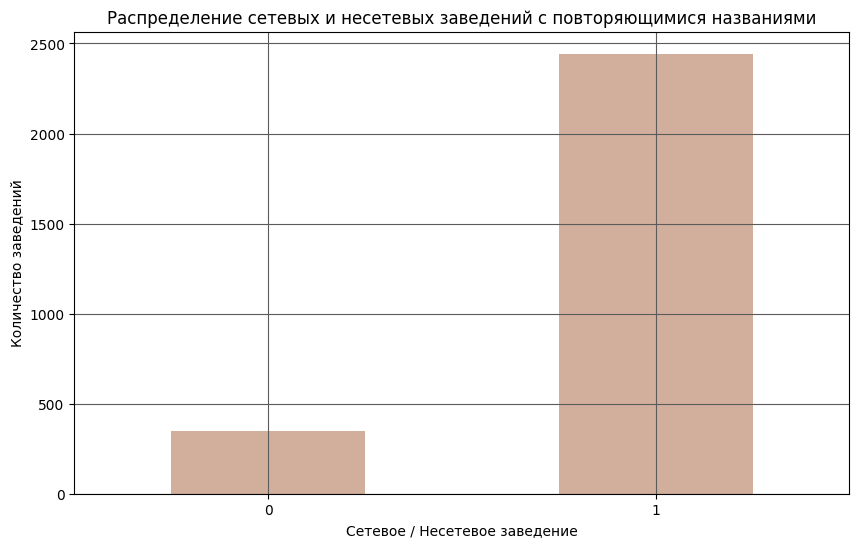

In [34]:
#Строим столбчатую диаграмму на основании полученного среза данных

duplicates_name_df.plot(kind  = 'bar',
        title = 'Распределение сетевых и несетевых заведений с повторяющимися названиями',
        xlabel = "Сетевое / Несетевое заведение",
        ylabel = 'Количество заведений',
        legend = False,
        color = '#d2af9d',
        rot = 0,
        figsize = (10,6)
        )
#добавляем сетку
plt.grid(color = '#5b5b5b')

#отображаем график
plt.show()

<font color='#777778'>Из распредедения видно, что большинство из дубликатов в столбце `name` действительно соответствует сетевым заведениям.

<font color='#777778'>Небольшое количество заведений не относится к сетевым, однако из описания к данными мы понмним, что присвоение признака `chain` может быть неверным для небольших сетей. Проведем дополнительную проверку уникальности навзаний заведений в связке `name` - `address`. Для начала проведем нормализацию данных в столбцах, приведя их к нижнему регистру.

In [35]:
#Проводим нормализацию данных в столбцах name, address
merged_df['name'] = merged_df['name'].str.lower()
merged_df['address'] = merged_df['address'].str.lower()

In [36]:
#Проверяем количество дубликатов в связке name - address
duplicates_name =  merged_df.duplicated(subset = ['name', 'address']).sum()
print(f'Количество дубликатов в столбце name и address: {duplicates_name}')

Количество дубликатов в столбце name и address: 4


<font color='#777778'> После нормализации данных связке name - address встречается четыре дубликата. Оставим только уникальные значения, воспользовавшись методом `drop_duplicates()`. Параметр 'keep' оставим по умолчанию для сохранения первой уникальной записи.

In [37]:
#Убираем дубликаты при помощи drop_duplicates()
merged_df = merged_df.drop_duplicates(subset = ['name','address'])

#Проверяем успешность обработки
duplicates_name =  merged_df.duplicated(subset = ['name', 'address']).sum()
print(f'Количество дубликатов в столбце name и address: {duplicates_name}')

Количество дубликатов в столбце name и address: 0


<font color='#777778'> Дубликаты в связке `name` - `address` устранены.

In [38]:
#Проверим уникальность значений в столбцах с категориальнымми данными
for column in ['district','category']:
  print(f'Уникальные значения в {column}: ')
  print('\n')
  print(merged_df[column].sort_values().unique())
  print('\n')

Уникальные значения в district: 


['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']


Уникальные значения в category: 


['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']




<font color='#777778'> Категориальные данные в столбцах `district` и `category` являются уникальными. Неявных дубликатов не выявлено.

<font color='#777778'> Анализ дубликатов в датафрейме `merged_df` показал наличие 4-х дубликатов в связке `name` - `address`. При помощи метода drop_duplicates были оставлены только уникальные значения.

<font color='#777778'> Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае. </font>

<font color='#777778'> Созадим нужный столбец при помощи `.str.contains()`

In [39]:
#Создаем нужный столбец при помощи .str.contains()
merged_df['is_24_7'] = merged_df['hours'].str.contains('ежедневно, круглосуточно')

In [40]:
#Проверяем результат создания столбца
merged_df['is_24_7'].value_counts()

,count
is_24_7,
False,7672
True,730


<font color='#777778'> 730 из 8406 анализируемых заведений работают круглосуточно.

---

### Промежуточный вывод

<font color='#777778'> В ходе обработки были выполнены преобразования типов данных в столбцах `chain` и `seats` к целочисленному типу с понижением разрядности.

<font color='#777778'> Была произведена замена пропусков на значение-индикаторы в столбцах `hours` и `middle_avg_bill`. В остальных столбцах пропуски были оставлены без изменений.

<font color='#777778'>В ходе проверки было выявлено 4 дубликата в связке `name` = `address`. Они были обработаны при помощи метода drop_duplicates.

<font color='#777778'>Для дальнейшей работы был создан столбец `24/7`, который отражает, работает ли заведение круглосуточно.

<font color='#777778'>На этом предварительная обработка данных заверешена.

## 3. Исследовательский анализ данных

---

### Задача 1

<font color='#777778'> Изучим, какие категории заведений представлены в данных.

In [41]:
#Рассчиаем количество заведений в каждой категории при помощи value_counts()
categories_values = pd.DataFrame(merged_df['category'].value_counts().sort_values(ascending = False))

#Найдем долю каждой категории от общего количества заведений
categories_values['share'] = round(merged_df['category'].value_counts() / merged_df.shape[0] * 100, 2)

#Применим форматирование и выведем получившийся результат
categories_values.sort_values(by = 'share',ascending = False).style.background_gradient(cmap='RdYlGn_r', axis=0, subset = 'share')

,count,share
category,,
кафе,2376,28.280000
ресторан,2042,24.300000
кофейня,1413,16.820000
"бар,паб",764,9.090000
пиццерия,633,7.530000
быстрое питание,603,7.180000
столовая,315,3.750000
булочная,256,3.050000


<font color='#777778'>Больше всего заведений представлено в категории `кафе` и `ресторан`. Распространенным также является такой формат заведения как `кофейня`. Очевидно, что конкуренция среди заведений такого формата должна быть довольно высокая. Однако для более детального понимания необходимо проанализировать распределение заведений внутри районов Москвы. Вполне возможно, что есть районы, где количество заведений данного формата не слишком высоко.

<font color='#777778'>Наименее распространенным является такой формат заведений как `столовая` и `булочная`. Скорее всего конкуренция среди заведений такого формата невысокая, однако возможно, что такое небольшое количество заведений связано с непопулярностью данных форматов.

<font color='#777778'>Построим столбчатую диаграмму для более наглядного отображения распределения типов заведений по категориям.

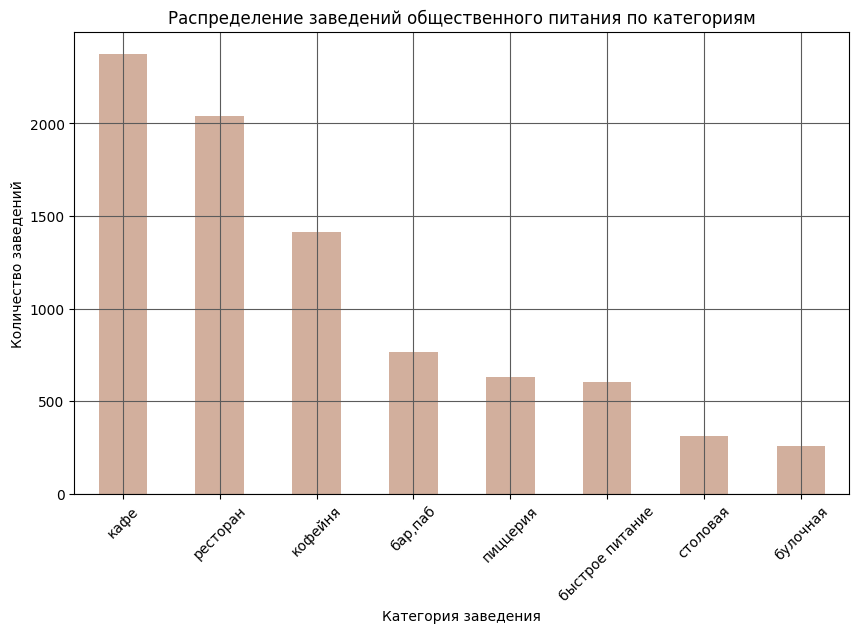

In [42]:
#Строим столбчатую диаграмму

merged_df['category'].value_counts().plot(kind  = 'bar',
        title = 'Распределение заведений общественного питания по категориям',
        xlabel = "Категория заведения",
        ylabel = 'Количество заведений',
        legend = False,
        color = '#d2af9d',
        rot = 45,
        figsize = (10,6)
        )
#добавляем сетку
plt.grid(color = '#5b5b5b')

#отображаем график
plt.show()

<font color='#777778'>Теперь распределение заведений общественного питания по категориям изображено наглядно. На диаграмме отчетливо видно неравномерное распределение заведений по типам с явным преобладанием заведений типа `кафе`, `ресторан` и `кофейня`.

---

### Задача 2

<font color='#777778'> Изучим, какие районы Москвы представлены в данных и, какое количество заведений представлено в каждом районе, при помощи value_counts().

In [43]:
#Рассчитаем, какие районы Москвы присутствуют в данных при помощи value_counts()
districts_df = pd.DataFrame(merged_df['district'].value_counts().sort_values(ascending = False))

#Найдем долю каждого района Москвы
districts_df['share'] = round(merged_df['district'].value_counts() / merged_df.shape[0] * 100, 2)

#Отформатируем результат
districts_df.sort_values(by = 'share',ascending = False).style.background_gradient(cmap='RdYlGn_r', axis=0, subset = 'share')

,count,share
district,,
Центральный административный округ,2242,26.680000
Северный административный округ,898,10.690000
Южный административный округ,892,10.620000
Северо-Восточный административный округ,890,10.590000
Западный административный округ,850,10.120000
Восточный административный округ,798,9.500000
Юго-Восточный административный округ,714,8.500000
Юго-Западный административный округ,709,8.440000
Северо-Западный административный округ,409,4.870000


<font color='#777778'>Из распределения видно, что наибольшее количество заведений сосредоточено в Центральном административном округе. Это говорит как о высокой посещаемости заведений общественного питания в данном районе, так и о высокой конкуренции.

<font color='#777778'>Скорее всего новым заведениям сложно развиваться в условиях такой высокой конкуренции, особенно, если заведение не относится к известной сети или ресторанному холдингу.

<font color='#777778'>Изучим распределение типов заведений внутри Центрального административного округа для того, чтобы понимать, какие ниши могут быть более удобными для открытия новго заведения общественного питания.

In [44]:
#Cоздадим срез данных только по Центральному административному округу Москвы
central_district_df = merged_df[(merged_df['district'] == 'Центральный административный округ')].copy()

#Рассчитаем, какие районы Москвы присутствуют в данных при помощи value_counts()

districts_df = pd.DataFrame(central_district_df['category'].value_counts().sort_values(ascending = False))

#Найдем долю каждого района Москвы
districts_df['share'] = round(central_district_df['category'].value_counts() / central_district_df.shape[0] * 100, 2)

#Отформатируем результат
districts_df.sort_values(by = 'share',ascending = False).style.background_gradient(cmap='RdYlGn_r', axis=0, subset = 'share')

,count,share
category,,
ресторан,670,29.880000
кафе,464,20.700000
кофейня,428,19.090000
"бар,паб",364,16.240000
пиццерия,113,5.040000
быстрое питание,87,3.880000
столовая,66,2.940000
булочная,50,2.230000


<font color='#777778'> Преобладающей категорией заведения в Центральном административном округе являются `ресторан`, `кафе`, `кофейня`, `бар, паб`.

<font color='#777778'> Для более наглядного отображения распределения построим столбчатую диаграмму.

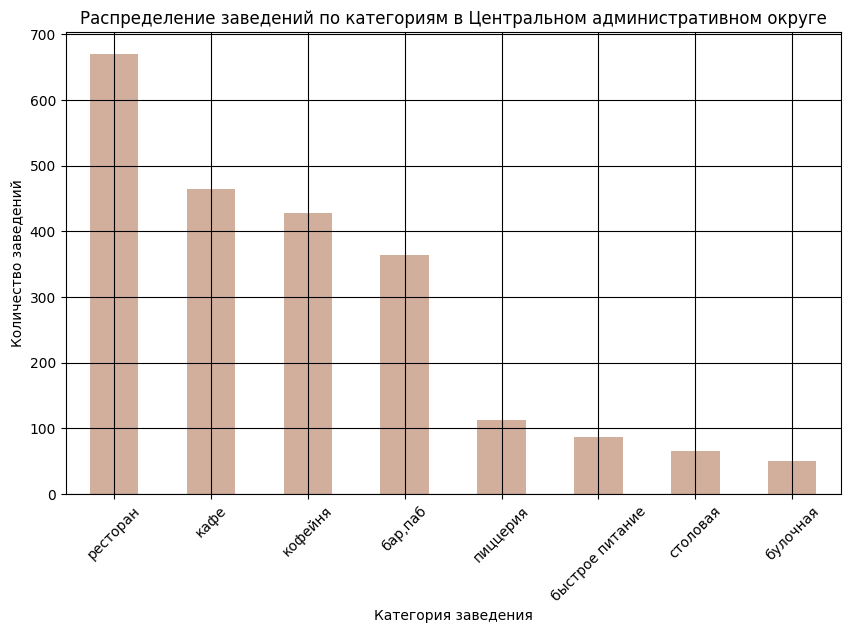

In [45]:
#Строим столбчатую диаграмму
grouped = merged_df[(merged_df['district'] == 'Центральный административный округ')].copy().groupby('category')['id'].count().sort_values(ascending = False)
grouped.plot(kind='bar',
               title=f'Распределение заведений по категориям в Центральном административном округе',
               legend=False,
               ylabel='Количество заведений',
               xlabel='Категория заведения',
               color = '#d2af9d',
               rot= 45,
               figsize=(10, 6))

plt.grid(color = 'black')

# Выводим график
plt.show()

<font color='#777778'>Анализ распределения заведений по районам Москвы показал, что большая часть заведений расположена в Центральном административном районе Москвы - 26.68%. При этом ни в одном районе Москвы не наблюдается количества заведений близкого к данному.

<font color='#777778'>Это делает район и одновременно привлекательным, поскольку он является одним из самых активных и посещаемых, и при этом задирает высокую планку по конкуренции.

<font color='#777778'>Изучение распределения заведений внутри Центрального административного округа показало, что наиболее популярными типам заведений являются `кафе`, `ресторан`, `кофейня`, `бар, паб`. Поскольку именно в Центральном административном округе сосредоточена большая часть заведений общественного питания, именно данный округ задает тендецию по распределению заведений между их категориями для Москвы в целом.

---

### Задача 3

<font color='#777778'> Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.

<font color='#777778'> Для начала найдем соотношение между сетевыми и несетевыми заведениями по Москве в целом при помощи `value_counts()`. Далее построим столбчатую диаграмму для визуализации.

In [46]:
#Находим количество сетевых и несетевых заведений по Москве в целом при помощи value_counts()
chain_df = pd.DataFrame(merged_df['chain'].value_counts().sort_values(ascending = False))

#Находим долю каждой группы
chain_df['share'] = round(merged_df['chain'].value_counts() / merged_df.shape[0] * 100, 2)

#Выводим результат
chain_df

,count,share
chain,,
0,5199,61.88
1,3203,38.12


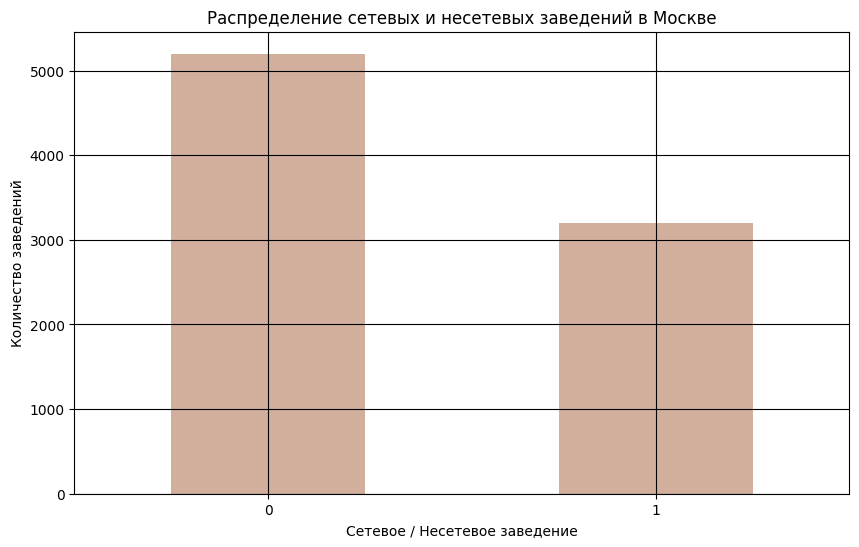

In [47]:
#Строим столбчатую диаграмму
grouped = merged_df.groupby('chain')['id'].count().sort_values(ascending = False)
grouped.plot(kind='bar',
               title=f'Распределение сетевых и несетевых заведений в Москве',
               legend=False,
               ylabel='Количество заведений',
               xlabel='Сетевое / Несетевое заведение',
               color = '#d2af9d',
               rot= 0,
               figsize=(10, 6))

plt.grid(color = 'black')

# Выводим график
plt.show()

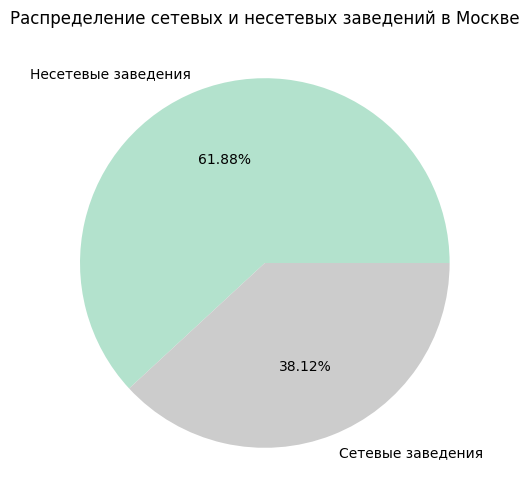

In [48]:
#Строим круговую диаграмму
grouped.plot(kind='pie',
               title=f'Распределение сетевых и несетевых заведений в Москве',
               ylabel = "",
               labels = ['Несетевые заведения', 'Сетевые заведения'],
               autopct='%1.2f%%',
               cmap = 'Pastel2',
               figsize=(10, 6))

# Выводим круговую диаграмму
plt.show()

<font color='#777778'> Из распределения видно, что количество несетевых заведений значительно превышает количество сетевых (61,88% к 38,12%).

<font color='#777778'> Изучим распределение по категориям для того, чтобы выяснить, какие заведения как правило являются сетевыми, а какие нет. Для этого построим еще одну столбчатую диаграмму с использованием `unstack()`.


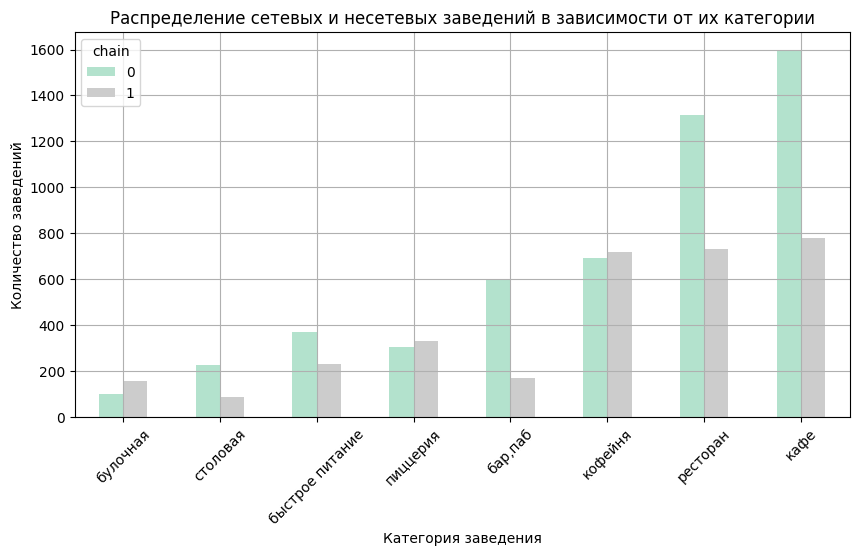

In [49]:
#Группируем данные
grouped = merged_df.groupby('category')['chain'].value_counts().unstack(fill_value = 0)

grouped = grouped.sum(axis = 1).sort_values(ascending = True)

grouped =  merged_df.groupby('category')['chain'].value_counts().unstack(fill_value = 0).loc[grouped.index]

#Строим столбчатую диаграмму
grouped.plot( kind = 'bar',
              title=f'Распределение сетевых и несетевых заведений в зависимости от их категории',
              legend=True,
              ylabel='Количество заведений',
              xlabel='Категория заведения',
              rot=45,
              colormap = 'Pastel2',
              figsize=(10, 5))
plt.grid()

# Выводим график
plt.show()

<font color='#777778'>Небольшое преобладание сетевых заведений наблюдается в таких категориях как `булочная`, `кофейня`, `пиццерия`. При этом преобладание сетевых заведений над несетевыми незначительное.

<font color='#777778'>Заметна выраженная тенденция к преобладанию несетевых заведений в других категориях. Особенно заметен разрыв для таких категорий как `кафе`, `ресторан`, `бар, паб`.

<font color='#777778'>В целом можно сделать вывод о большом количестве независимых заведений общественного питания в Москве. С одной стороны это хорошо, потому что рынок не монополизирован крупными сетями, а с другой стороны такое изобилие несетвых заведений порождает сильную конкуренцию и делает выход нового заведения на рынок довольно сложным.

---

### Задача 4

<font color='#777778'> Исследуем количество посадочных мест в заведениях. Для того, чтобы увидеть распределение построим гистрограмму, а для того, чтобы проверить данные на наличие аномалий и выбросов построим диаграмму размаха.

In [50]:
# Изучаем статистические показатели столбца seats
print('Статистические показатели столбца seats:')
merged_df['seats'].describe()

Статистические показатели столбца seats:


,seats
count,4792.0
mean,108.361436
std,122.84113
min,0.0
25%,40.0
50%,75.0
75%,140.0
max,1288.0


<font color='#777778'> Построим гистограмму для того, чтобы оценить распределение в столбце `seats`.

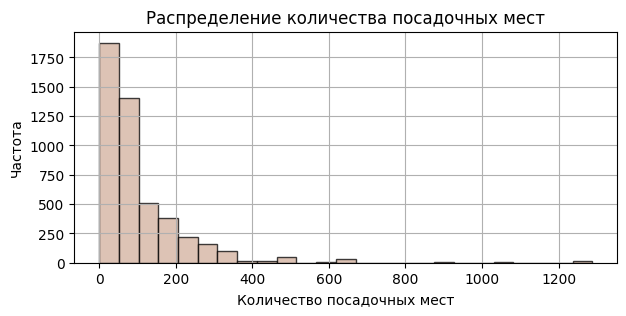

In [51]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму
merged_df['seats'].plot(
                kind='hist',
                bins=25,
                alpha=0.75,
                color = '#d2af9d',
                edgecolor='black',
                rot=0
)

# Настраиваем оформление графика
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

<font color='#777778'> Построим диаграмму размаха.

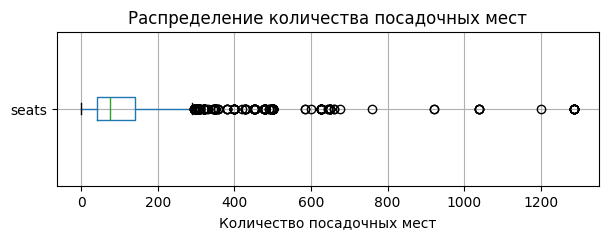

In [52]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце seats
merged_df.boxplot(column='seats', vert=False)# Добавляем заголовок и метки оси
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')

# Выводим график
plt.show()

<font color='#777778'> Из распределения видно, что в данных наблюдается ярко-выраженный левый хвост.
75-й процентиль свидетельствует о том, что для большинства заведений из списка количество посадочных мест не первышает 140, а для половины заведений количество посадочных мест не превышает 75. При этом в данных наблюдаются аномально большие значения, которые вряд ли соответствуют действительности (больше 300 посадочных мест). Нельзя с точностью утверждать, что данные значения являются некорректными, поскольку в заведении может быть банкетный зал, рассчитанный на проведение крупных мероприятий и вмещающий большое количество человек. Поэтому исключать такие заведения из выборки нельзя, так как высокое количество посадочных мест может соответствовать действительности.

<font color='#777778'> Найдем наиболее типичное количество посадочных мест для каждого типа заведений. Для начала рассчитаем количество раз, которое встречается каждое из значений `seats`, а далее найдем те значения, которые встречаются в рамках категории максимальное количество раз. Таким образом, мы вычислим моду для каждой категории заведений.


In [53]:
#Рассчитываем, какое количество раз встречается каждое из значений seats в рамках категории
grouped_seats = pd.DataFrame(merged_df.groupby('category')['seats'].value_counts())

#Переименовываем столбцы получившегося датафрейма
grouped_seats = grouped_seats.rename(columns={'category': 'category', 'seats' : 'seats','seats':'count'})

#Находим индекс максимального элемента внутри каждой группы
id_max = grouped_seats.groupby('category')['count'].idxmax()

#Отбираем макисмальные значения по индексу
max_scores = grouped_seats.loc[id_max]

max_scores.sort_values(by = 'seats')

,,count
category,seats,
булочная,0,11
быстрое питание,0,18
кафе,40,77
пиццерия,40,22
столовая,40,16
"бар,паб",60,31
кофейня,100,36
ресторан,100,72


<font color='#777778'> Самое высокое количество мест - 100 соответствует таким типам заведений как `ресторан` и `кофейня`. Высокое количество посадочных мест в ресторанах может быть обусловлено наличием банкетных залов для проведения мероприятий, а большое количество посадочных мест в кофейнях может быть связано с тем, что в последние годы данные заведения стали очень популярными среди тех, кто работает удаленно и могут использоваться как ко-воркинги.

<font color='#777778'> Для заведений такого формата как кафе, пиццерия и столовая наиболее типичное количество посадочных мест - 40, что говорит о том, что большинство заведений в данных категориях среднего размера и предполагают не слишком большую вместимость. Возможно они рассчитаны на большую проходимость и на то, что люди частично будут заказывать блюда на вынос, не занимая посадочные места.

<font color='#777778'> Для булочных и заведений быстрого питания наиболее типичным количеством посадочных мест является 0, что также вполне логично, потому что очень часто заведения такого типа могут занимать очень маленькую площадь и предполагать приготовление продукции на вынос.

---

### Задача 5

<font color='#777778'>Исследуем рейтинг заведений.

<font color='#777778'>Вычислим средний рейтинг по заведениям Москвы в целом и сравним его с средним рейтингом внутри каждой категории заведений.

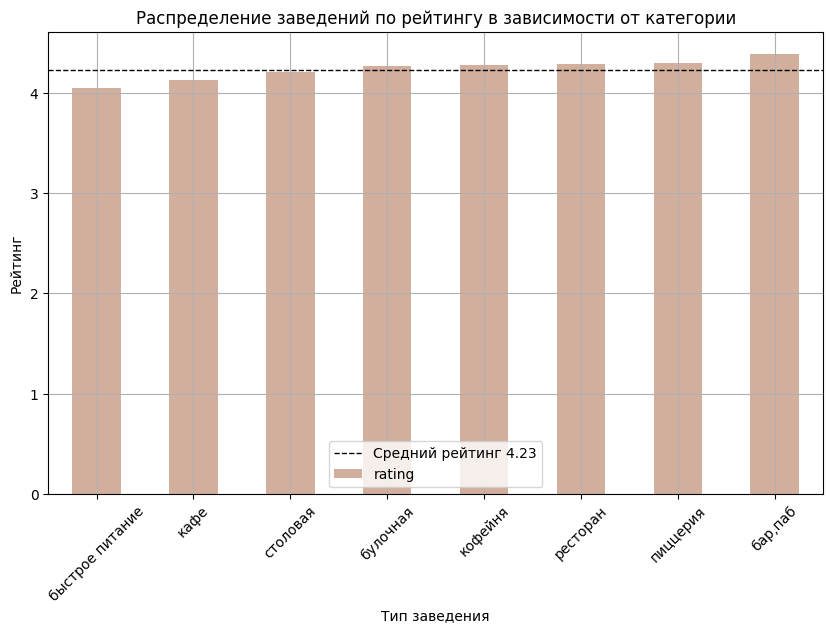

In [54]:
# Строим столбчатую диаграмму
grouped = merged_df.groupby('category')['rating'].mean().sort_values(ascending = True)
grouped.plot(kind='bar',
               title=f'Распределение заведений по рейтингу в зависимости от категории',
               legend=True,
               ylabel='Рейтинг',
               xlabel='Тип заведения',
               rot=45,
               color = '#d2af9d',
               figsize=(10, 6))

# Рассчитываем среднее значение рейтинга по всем заведениям Москвы
mean_rating = merged_df['rating'].mean()

# Наносим на график линию с средним значением рейтинга по всем заведениям Москвы
plt.axhline(mean_rating, # Данные, по которым строится линия
            color='black',
            linestyle='--',
            linewidth=1,
            label=f'Средний рейтинг {round(mean_rating,2)}')

plt.grid()
plt.legend()

# Выводим график
plt.show()

<font color='#777778'>Средний рейтинг для всех заведений Москвы составляет - 4,23.

<font color='#777778'>Значения среднего рейтинга внутри различных категорий заведений различаются незначительно. Примечательно, что для всех категорий заведенний средний рейтинг не опускается ниже 4.

<font color='#777778'>Рейтинг выше среднего по Москве у таких категорий как `бар,паб`,`булочная`, `кофейня`, `пиццерия`,`ресторан`.

<font color='#777778'>Самый низкий рейтинг в рамках категории заведений у заведений типа `быстрое питание`.

---

### Задача 6

<a class='anchor' id="link1"></a>

<font color='#777778'> Рассчитаем матрицу корреляции `phi_k` для рейтингов заведений и проверим, с какими из категориальных данных наблюдается высокая корреляция. Для наглядного отображения визуализируем полученный результат в виде тепловой карты.

In [55]:
#Рассчитываем матрицу корреляции
corr_matrix = merged_df[['rating','category','district','chain',
                         'seats','price','is_24_7']].phik_matrix()

#Выводим результат для rating
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
corr_matrix.loc[corr_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['rating', 'chain', 'seats']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.220295
district,0.200761
category,0.189716
is_24_7,0.150365
chain,0.107833
seats,0.000000


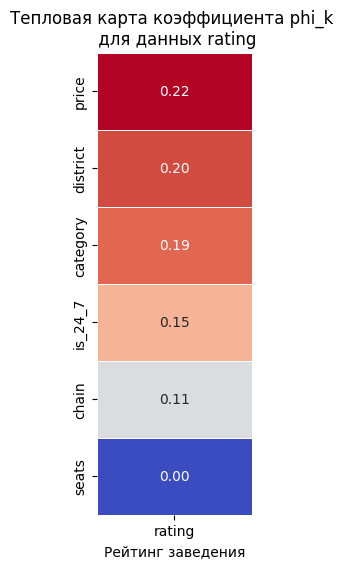

In [56]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Находим матрицу корреляции rating с другими признаками заведений
data_heatmap = corr_matrix.loc[corr_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5,
            cbar=False
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг заведения')

# Выводим график
plt.show()

<font color='#777778'> Наибольшая корреляция `rating` наблюдается с `price`, `district` и `category`. Проверим, действительно ли существует корреляция между рейтингом заведения и его ценовой категорией. Для этого сравним значение среднего рейтинга внутри каждой ценовой категории с средним рейтингом заведений по Москве в целом и посмотрим, есть ли тенденция к изменению рейтинга в зависимости от ценовой категории заведения.

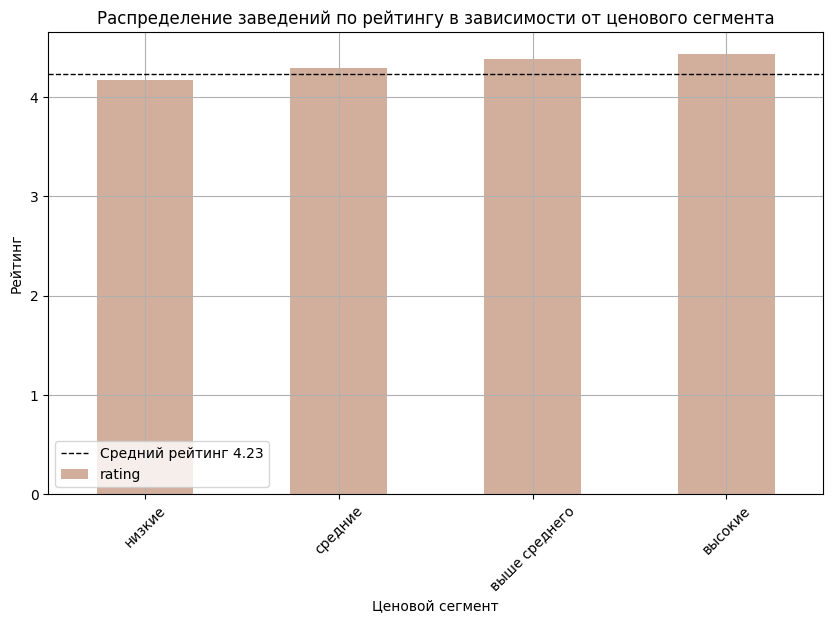

In [57]:
# Строим столбчатую диаграмму
grouped = merged_df.groupby('price')['rating'].mean().sort_values(ascending = True)
grouped.plot(kind='bar',
               title=f'Распределение заведений по рейтингу в зависимости от ценового сегмента',
               legend=True,
               ylabel='Рейтинг',
               xlabel='Ценовой сегмент',
               rot=45,
               color = '#d2af9d',
               figsize=(10, 6))

# Рассчитываем среднее значение рейтинга по всем заведениям Москвы
mean_rating = merged_df['rating'].mean()

# Наносим на график линию с средним значением рейтинга по всем заведениям Москвы
plt.axhline(mean_rating, # Данные, по которым строится линия
            color='black',
            linestyle='--',
            linewidth=1,
            label=f'Средний рейтинг {round(mean_rating,2)}')

plt.grid()
plt.legend()

# Выводим график
plt.show()

<font color='#777778'>  Визуализация показывает, что чем выше ценовой сегмент заведения, тем выше его средний рейтинг. Пускай и разница между значениями незначительная, отчетливо наблюдается положительная корреляция между ценовым сегментом заведения и его рейтингом. Скорее всего это связано с тем, что чем выше ценовой сегмент заведения, тем выше стандарты обслуживания. Скорее всего в заведениями с более высоким ценником делается упор не только на приготовление еды, но и на создание атмосферы и сервиса.

---

### Задача 7

<font color='#777778'>  Найдём топ-15 самых популярных заведений в Москве. Под популярностью будем понимать количество заведений опеределенной сети в регионе. Визуализируем результат в виде сводной таблицы.

In [58]:
#Создаем срез с сетевыми заведениями
chain_rests = merged_df[(merged_df['chain'] == 1)].copy()

In [59]:
#Создаем копию столбца name для того, чтобы избежать конфликта в названии столбцов при агрегации
chain_rests ['copy_name'] = chain_rests['name']

#Строим сводную таблицу
pivot = pd.pivot_table(chain_rests,
                              index = ['name','category'],
                              aggfunc = {'copy_name':  'count',
                                         'rating': 'mean'})

#Округляем значения рейтинга
pivot['rating'] = round(pivot['rating'],2)

#Сортируем результат по убыванию количества заведений
pivot = pivot.sort_values(by = 'copy_name', ascending = False)

#Выводим первые 15 строк
pivot_top_15 = pivot.head(15)
pivot_top_15

,,copy_name,rating
name,category,,
шоколадница,кофейня,119,4.18
домино'с пицца,пиццерия,76,4.17
додо пицца,пиццерия,74,4.29
one price coffee,кофейня,71,4.06
яндекс лавка,ресторан,69,3.87
cofix,кофейня,65,4.08
prime,ресторан,49,4.11
кофепорт,кофейня,42,4.15
кулинарная лавка братьев караваевых,кафе,39,4.39


In [60]:
#Выведем также резултат, отсортированный по убыванию значений рейтинга
pivot_top_15.sort_values(by = 'rating',ascending = False)

,,copy_name,rating
name,category,,
кофемания,кофейня,22,4.46
буханка,булочная,25,4.42
кулинарная лавка братьев караваевых,кафе,39,4.39
додо пицца,пиццерия,74,4.29
шоколадница,кофейня,119,4.18
домино'с пицца,пиццерия,76,4.17
кофепорт,кофейня,42,4.15
prime,ресторан,49,4.11
теремок,ресторан,36,4.11


<font color='#777778'> Самая распространенная сеть заведений общественного питания в Москве - **`"Шоколадница"`** (119 заведений). При этом средний рейтинг заведений данной сети не самый высокий по сравнению с другими сетями, попавшими в топ-15.

<font color='#777778'> На втором и третьем месте по количеству заведений расположились пиццерии - **`Домино'с Пицца`** и **`Додо Пицца`** с примерно одинаковым средним рейтингом и общим количеством заведений.

<font color='#777778'> Сеть кофеен **`Кофемания`** состоит всего из 22-х заведений и является самой малочисленной по количеству заведений среди топ-15, однако при этом имеет самое высокое значение среднего рейтинга.

<font color='#777778'> Для того, чтобы визуализировать распределение топ-15 заведений по категориям построим столбчатую диаграмму.

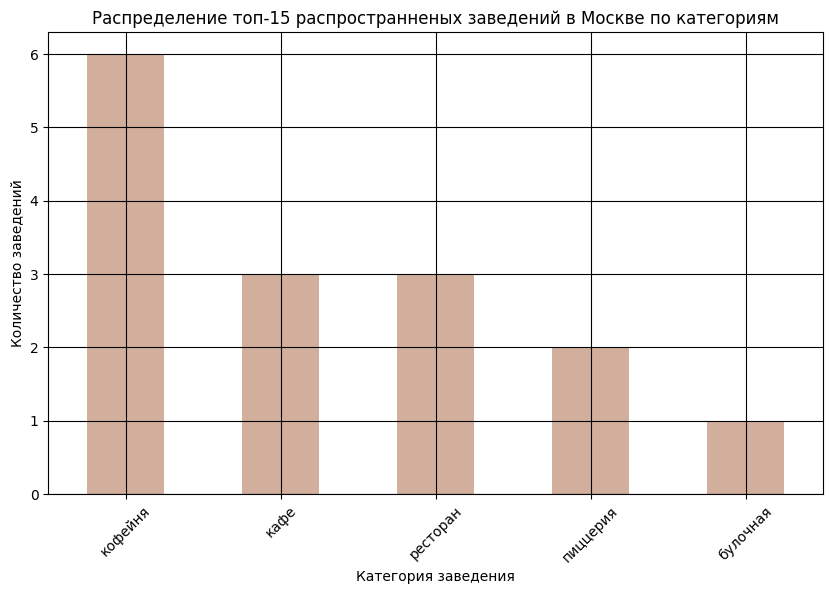

In [61]:
#Строим столбчатую диаграмму
grouped = pivot_top_15.groupby('category')['copy_name'].count().sort_values(ascending = False)
grouped.plot(kind='bar',
               title=f'Распределение топ-15 распространненых заведений в Москве по категориям',
               legend=False,
               ylabel='Количество заведений',
               xlabel='Категория заведения',
               color = '#d2af9d',
               rot= 45,
               figsize=(10, 6))

plt.grid(color = 'black')

# Выводим график
plt.show()

<font color='#777778'>Самая распространённая категория заведений из топ-15 - `кофейня`. Такие заведения составляют более трети от всех, представленных в топ-15. Такая статистика может говорить о том, что владельцы кофеен чаще всего продают франшизу для развития своего бизнеса, а также о том, что заведения данного типа требуют меньше всего капиталовложений при открытия новой точки и поэтому имеют такое широкое распространение.

<font color='#777778'> Меньше всего сетевых заведений представлено в категориях `булочная` и `пиццерия`. Это в том числе обусловлено тем, что заведений данной категории в принципе меньше, чем остальных, представленных в топ-15, и, как следствие, выборка по данным заведениям не такая большая.

---

### Задача 8

<font color='#777778'>Изучим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы.

<font color='#777778'> Для начала ознакомимся с средними значениями, минимальными и максимальным средними чеками для того, чтобы оценить данные на наличие возможных выбросов и скорректировать начальные точки при построении распределения.

In [62]:
#Ознакомимся с средними значениями middle_avg_bill по районам Москвы
grouped_mean = merged_df.groupby('district')['middle_avg_bill'].mean().sort_values(ascending = True)

print('Распределение средних значений middle_avg_bill по районам Москвы:')
grouped_mean

Распределение средних значений middle_avg_bill по районам Москвы:


,middle_avg_bill
district,
Юго-Восточный административный округ,654.097938
Северо-Восточный административный округ,716.611296
Юго-Западный административный округ,792.561702
Восточный административный округ,820.626923
Северо-Западный административный округ,822.222930
Южный административный округ,834.398089
Северный административный округ,927.959627
Западный административный округ,1053.225490
Центральный административный округ,1191.057547


<font color='#777778'>Самое высокое среднее значение `middle_avg_bill` в Центральном административном округе, самое низкое - в Юго-Восточном административном округе. Самое высокое и самое низкое значение различаются почти вдвое.

<font color='#777778'>Изучим минимальные значение `middle_avg_bill` по районам Москвы.

In [63]:
#Ознакомимся с минимальными значениями middle_avg_bill по районам Москвы
grouped_min = merged_df.groupby('district')['middle_avg_bill'].min().sort_values(ascending = True)

print('Распределение минимальных значений среднего чека по районам Москвы:')
grouped_min

Распределение минимальных значений среднего чека по районам Москвы:


,middle_avg_bill
district,
Центральный административный округ,0.0
Юго-Восточный административный округ,30.0
Восточный административный округ,50.0
Западный административный округ,50.0
Северо-Восточный административный округ,50.0
Юго-Западный административный округ,100.0
Южный административный округ,100.0
Северо-Западный административный округ,120.0
Северный административный округ,130.0


<font color='#777778'>В основном значения минимальных средних чеков кажутся адекватными за исключением Центрального административного округа. Минимальный размер среднего чека 0 - похож на ошибку в данных. Возьмем за минимальное значение среднего чека для Центрального административного округа 1-й процентиль.

In [64]:
min_price_first_percentile = merged_df[(merged_df['district'] == 'Центральный административный округ')]['middle_avg_bill'].quantile(q = 0.01)
print(f'Минимальное значение размера среднего чека для Центрального административного округа: {min_price_first_percentile}')

Минимальное значение размера среднего чека для Центрального административного округа: 171.72


<font color='#777778'>Такое минимальное значение средней цены больше похоже на правду и при этом является самым высоким среди рассматриваемых. Возьмем его за основу для Центрального административного округа при построении распределения средних цен.

<font color='#777778'>Рассчитаем максимальные значения средних цен.

In [65]:
#Ознакомимся с максимальными значениями middle_avg_bill по районам Москвы
grouped_max = merged_df.groupby('district')['middle_avg_bill'].max().sort_values(ascending = True)

print('Распределение максимальных значений среднего чека по районам Москвы:')
grouped_max

Распределение максимальных значений среднего чека по районам Москвы:


,middle_avg_bill
district,
Юго-Западный административный округ,2750.0
Северо-Западный административный округ,2900.0
Юго-Восточный административный округ,3750.0
Северо-Восточный административный округ,4500.0
Западный административный округ,5250.0
Центральный административный округ,7250.0
Восточный административный округ,10000.0
Северный административный округ,11000.0
Южный административный округ,35000.0


<font color='#777778'>Значения для Восточного административного округа, Северного административного округа и Южного административного округа похожи на выбросы, поскольку существенно превышают размер максимального чека в самом дорогостоящем Центральном административном округе Москвы. Возьмем для данных районов 99-й процентиль в качестве максимального значения при построения распределения для того, чтобы исключить аномальные значения.

In [66]:
for district in['Восточный административный округ',
                'Северный административный округ',
                'Южный административный округ']:
                max_price_nn_percentile = merged_df[(merged_df['district'] == district)]['middle_avg_bill'].quantile(q = 0.99)
                print(f'Максимальные значения размера среднего чека {district}: {max_price_nn_percentile}')

Максимальные значения размера среднего чека Восточный административный округ: 2705.0000000000127
Максимальные значения размера среднего чека Северный административный округ: 3447.500000000005
Максимальные значения размера среднего чека Южный административный округ: 2935.0000000000023


<font color='#777778'>ТТакие значения больше похожи на правду. Возьмем их в качестве максимальных для указанных регионов при построении распредедения.

<font color='#777778'>Можно приступать к построению графиков.

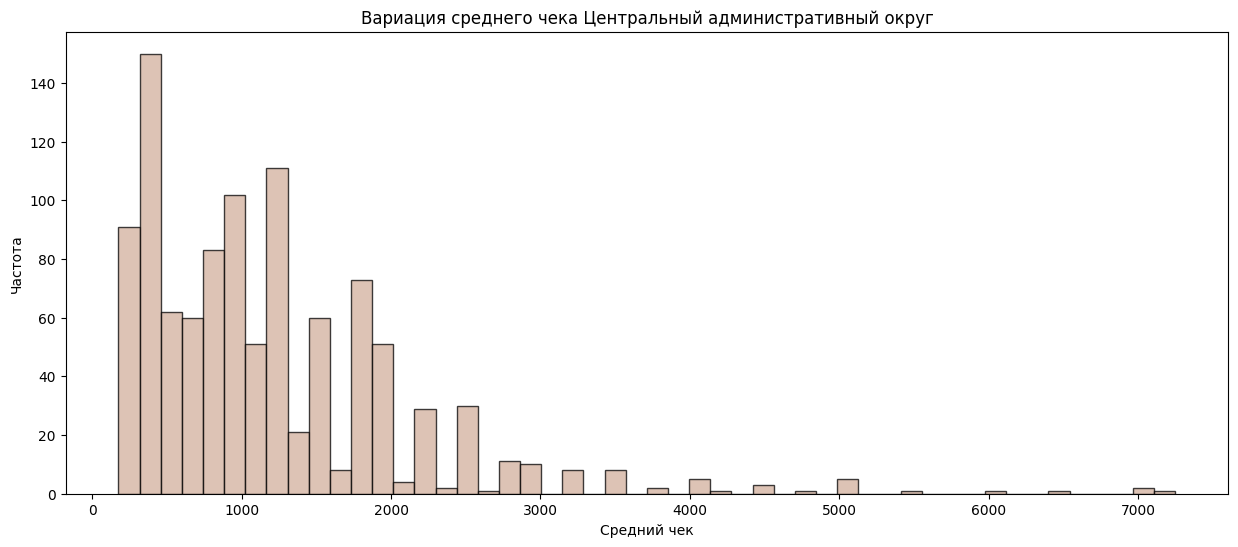

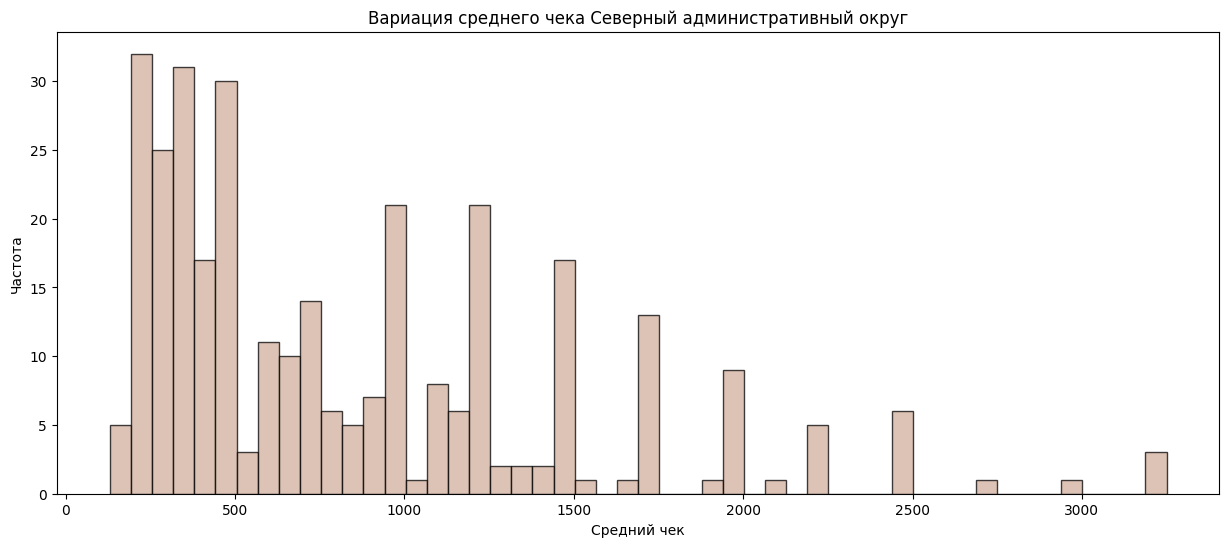

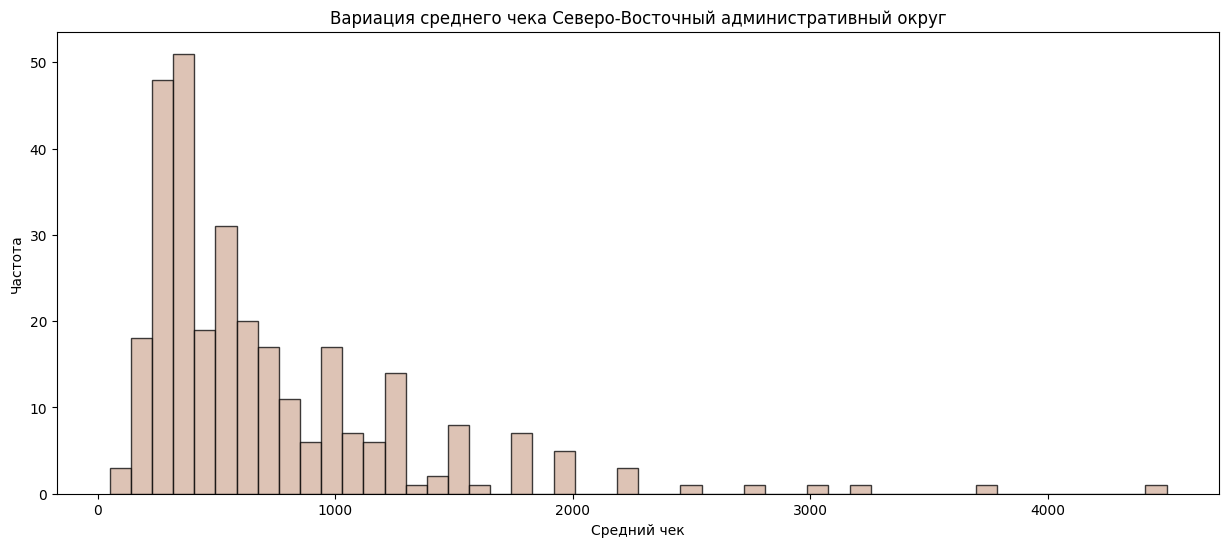

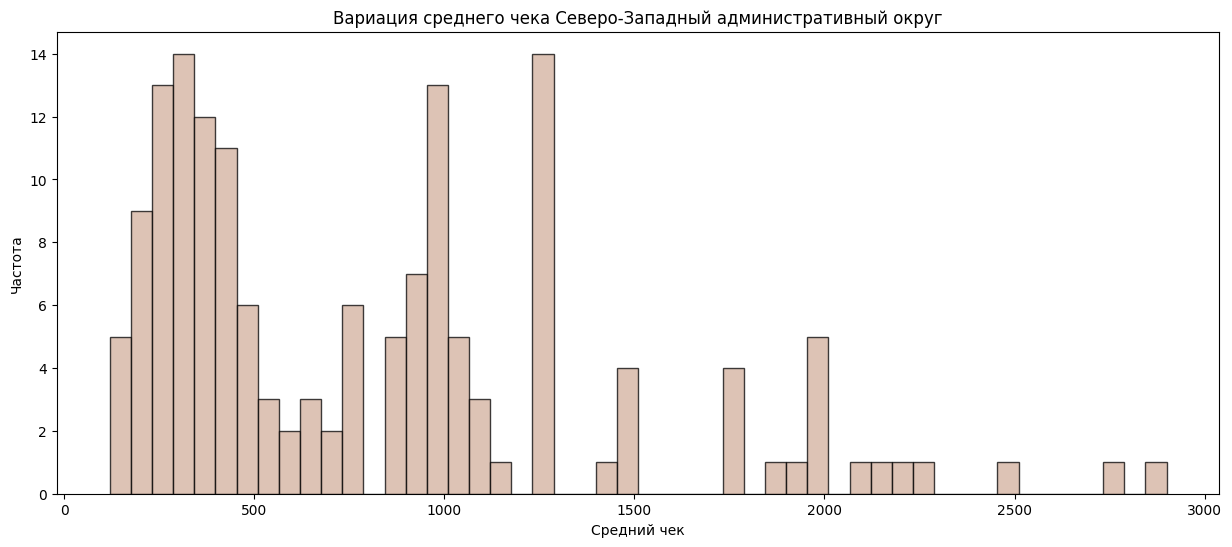

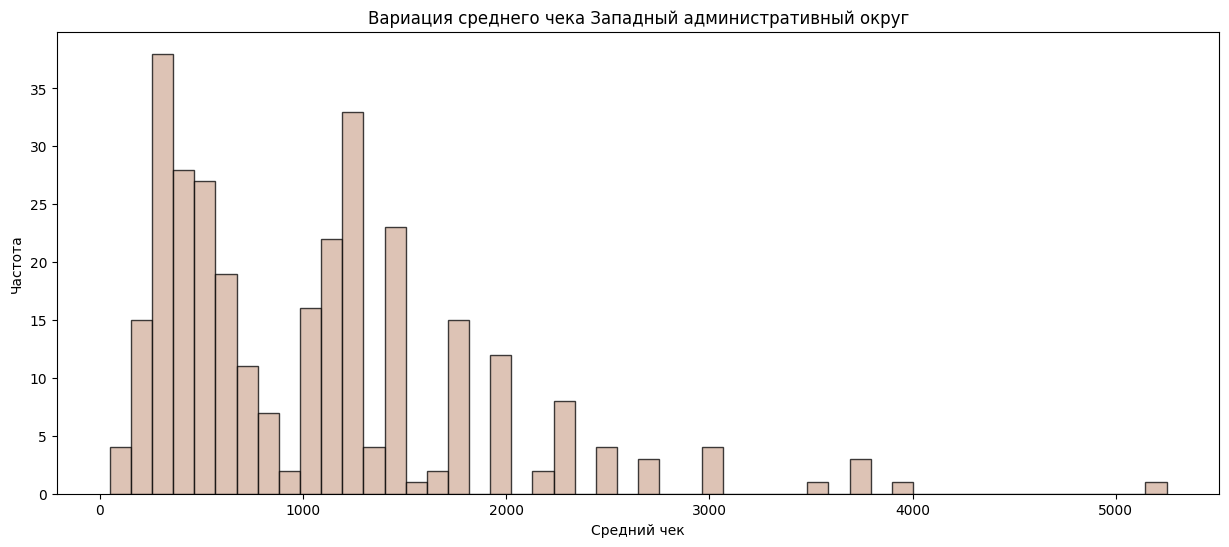

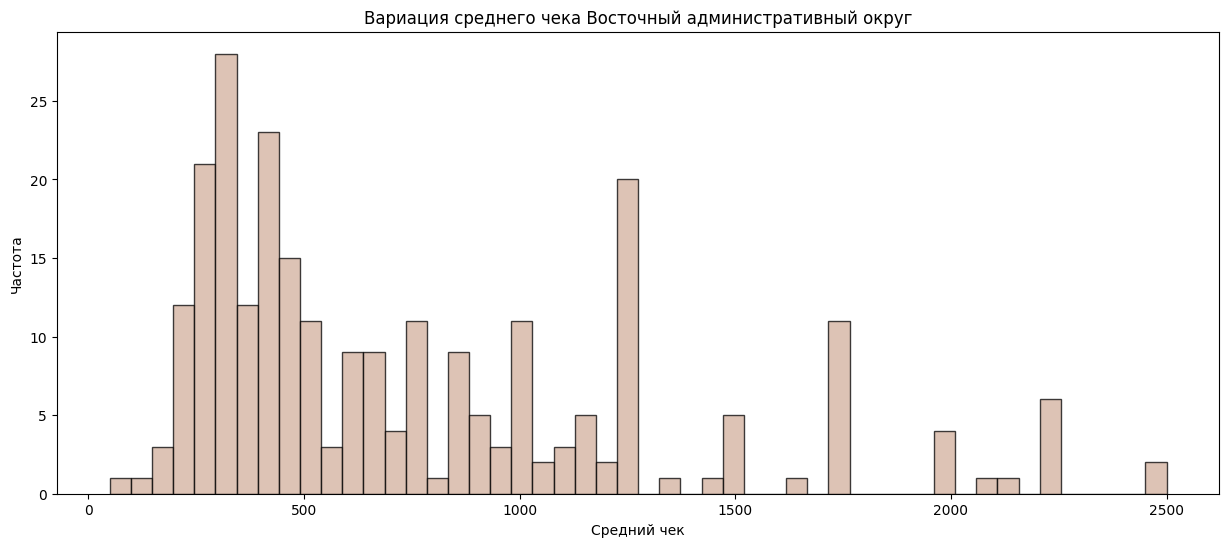

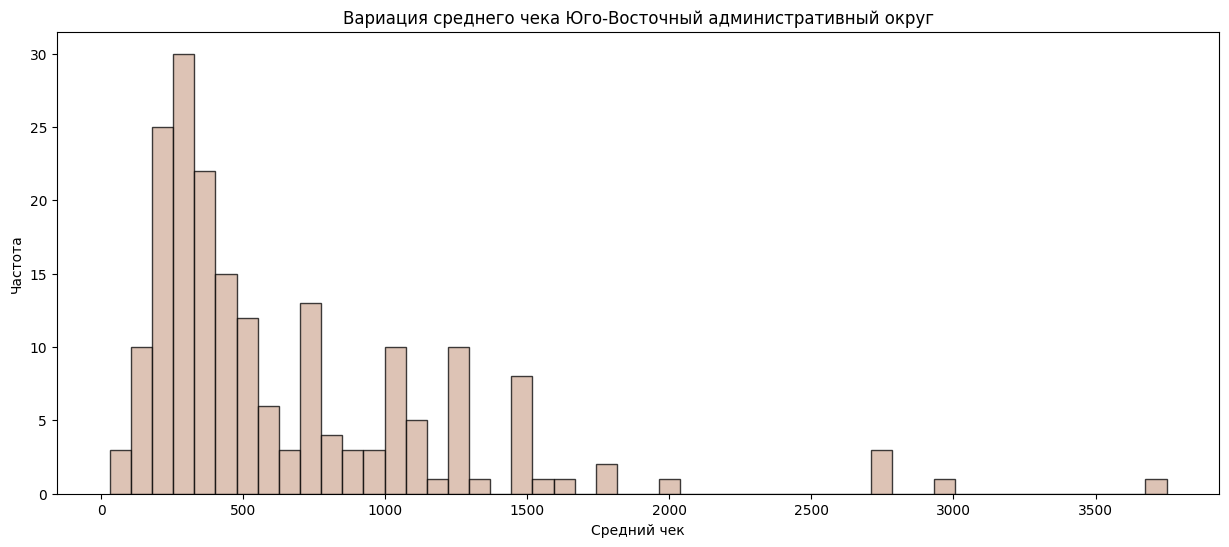

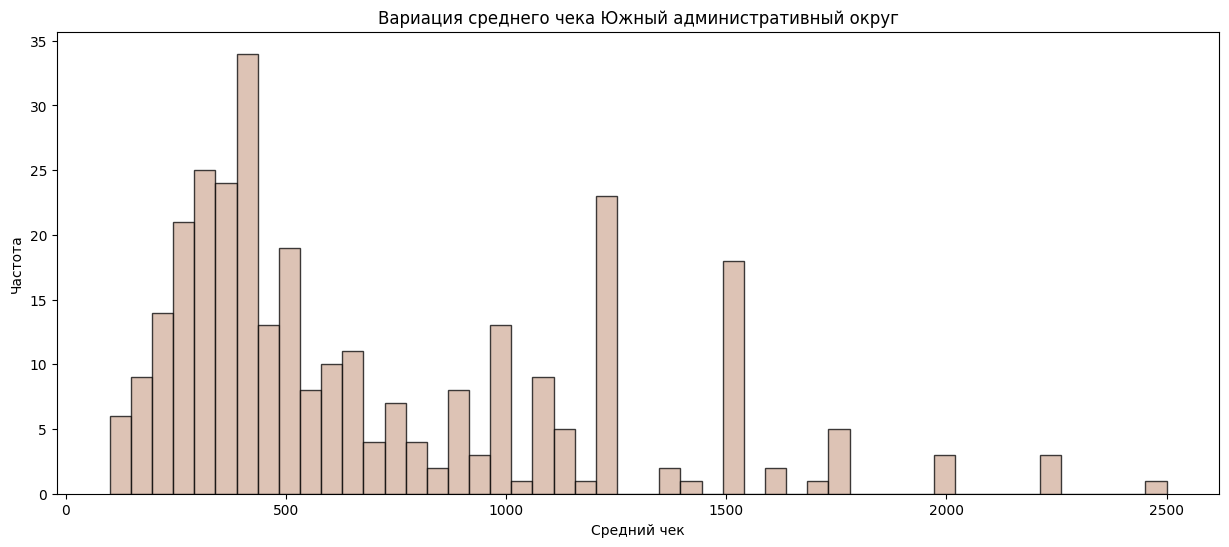

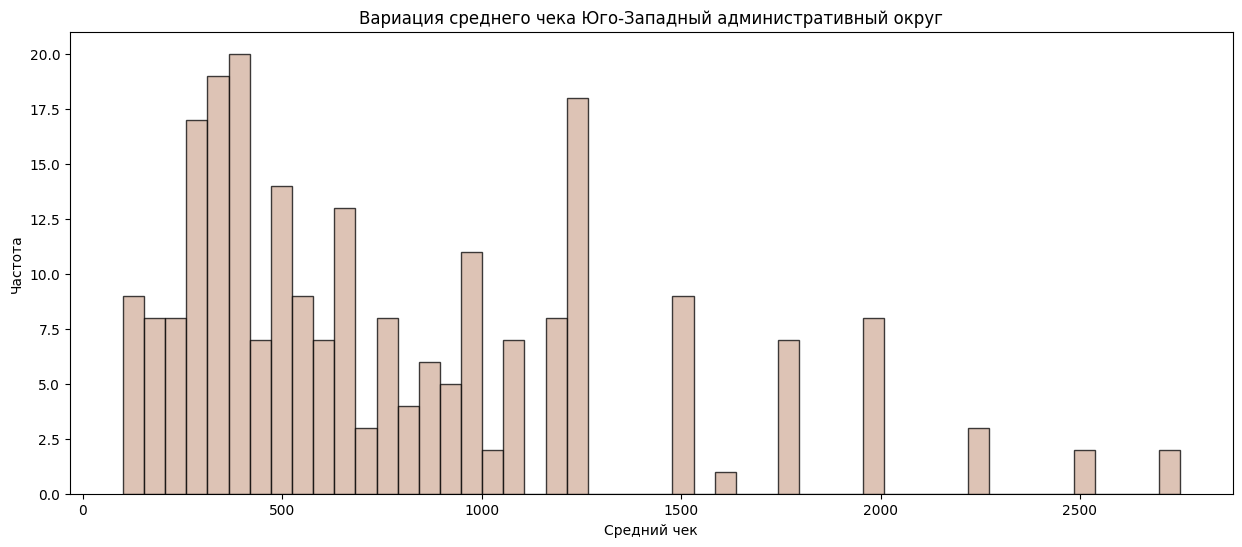

In [67]:
for district in ['Центральный административный округ',
       'Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ']:
    district_df = merged_df[(merged_df['district'] == district)].copy()


    #Исключаем выбросы при построении распределения через 1й и 99й процентили:
    first_percentile = district_df['middle_avg_bill'].quantile(q = 0.01)
    nn_percentile = district_df['middle_avg_bill'].quantile(q = 0.99)

    #Отбираем данные для построения распредедения по Центральному административному округу
    cleared_district_central = district_df[(district_df['middle_avg_bill'] >= first_percentile)]

    #Отбираем данные для построения распредедения по ВОА, СОА, ЮОА
    cleared_district_others = district_df[(district_df['middle_avg_bill'] <= nn_percentile)]

    #Строим график распредедения middle_avg_bill для каждого района Москвы
    plt.figure(figsize=(15, 6))
    if district == 'Центральный административный округ':
      cleared_district_central['middle_avg_bill'].plot(kind='hist',
                                                  bins=50,
                                                  alpha=0.75,
                                                  color = '#d2af9d',
                                                  edgecolor='black',
                                                  rot=0,)
    elif district == 'Восточный административный округ' or district == 'Северный административный округ' or district == 'Южный административный округ':
         cleared_district_others['middle_avg_bill'].plot(kind='hist',
                                                  bins=50,
                                                  alpha=0.75,
                                                  color = '#d2af9d',
                                                  edgecolor='black',
                                                  rot=0,)
    else:
      district_df['middle_avg_bill'].plot(kind='hist',
                                                  bins=50,
                                                  alpha=0.75,
                                                  color = '#d2af9d',
                                                  edgecolor='black',
                                                  rot=0,)
    # Настраиваем оформление графика
    plt.title(f'Вариация среднего чека {district}')
    plt.xlabel('Средний чек')
    plt.ylabel('Частота')

    # Выводим график
    plt.show()

<font color='#777778'>Для всех районов Москвы наблюдается выраженная тенденция к уменьшению количества заведений в каждом рассматриваемом диапазоне цен по мере увеличения размера среднего чека. При этом внутри каждого района наблюдается сильная вариативность размера среднего чека, которая скорее всего связана, с категорией заведения.

<font color='#777778'>Наибольшее скопление заведений сосредоточено в диапазоне среднего чека до 1500 рублей.

<font color='#777778'>Изучение средних, минимальных и максимальных значений по `middle_avg_bill` показало, что самые высокие показатели в центральном районе Москвы. По мере удаления от центра снижаются и данные показатели. Можно сделать вывод о том, что удаленность от центра влиает на снижение уровня цен в заведениях общественного питания.

---

### Задача 9

<font color='#777778'> Дополнительно изучим, как тип заведения может влиять на среднюю стоимость чашки кофе в заведении. Для этого сравним средее значение `middle_coffee_cup` внутри каждой категории с средним значением по Москве в целом.

<font color='#777778'> Для удобства анализа построим столбчатую диаграмму.


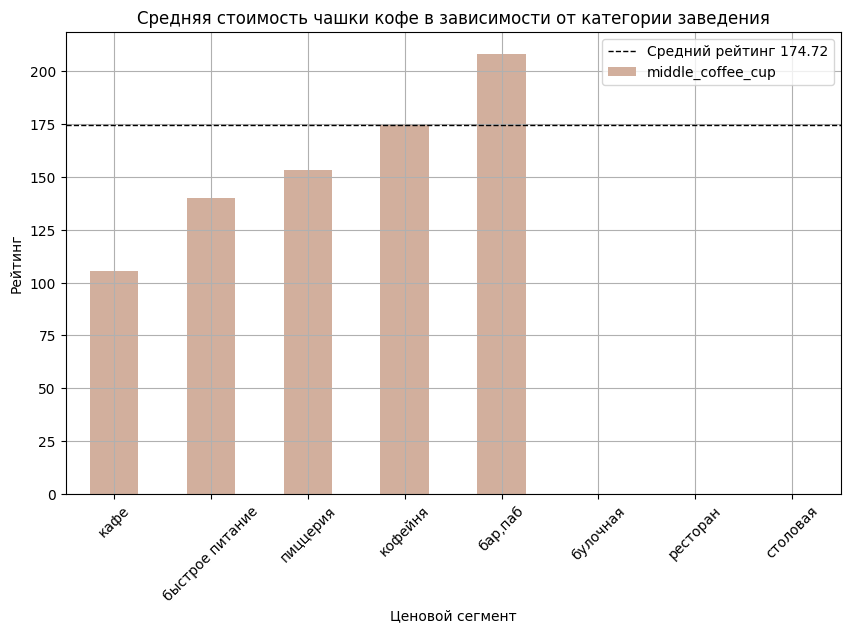

In [68]:
# Строим столбчатую диаграмму
grouped = merged_df.groupby('category')['middle_coffee_cup'].mean().sort_values(ascending = True)
grouped.plot(kind='bar',
               title=f'Средняя стоимость чашки кофе в зависимости от категории заведения',
               legend=True,
               ylabel='Рейтинг',
               xlabel='Ценовой сегмент',
               rot=45,
               color = '#d2af9d',
               figsize=(10, 6))

# Рассчитываем среднее значение стоимости чашки кофе по Москве
mean_coffee_cup = merged_df['middle_coffee_cup'].mean()

# Наносим на график линию с средним значением стоимости чашки кофе по Москве
plt.axhline(mean_coffee_cup, # Данные, по которым строится линия
            color='black',
            linestyle='--',
            linewidth=1,
            label=f'Средний рейтинг {round(mean_coffee_cup,2)}')

plt.grid()
plt.legend()

# Выводим график
plt.show()

<font color='#777778'>Заметно, что присутствует тенденция к увеличению средней стоимости чашки кофе в зависимости от типа заведения. Средняя стоимость чашки кофе по Москве в целом - 174.72 руб.

<font color='#777778'>При этом в кафе, заведении быстрого питания или в пиццерии чашка кофе в среднем обойдется дешевле чем в кофейне или в баре/пабе.

<font color='#777778'>Для булочных, ресторанов и столовых информация по `middle_coffee_cup` отсутствует, поэтому мы не можем оценить данные категории.

<font color='#777778'> На основании ранее рассчитанной [матрицы корреляции](#link1) проверим, действительно ли существует взаимосвязь между рейтингом заведения и его месторасположением. Для оценки распределения значений вновь рассчитаем средние значения рейтинга заведений в рамках каждого района Москвы, сопоставим их между собой и сравним с средним значением рейтинга по Москве в общемю

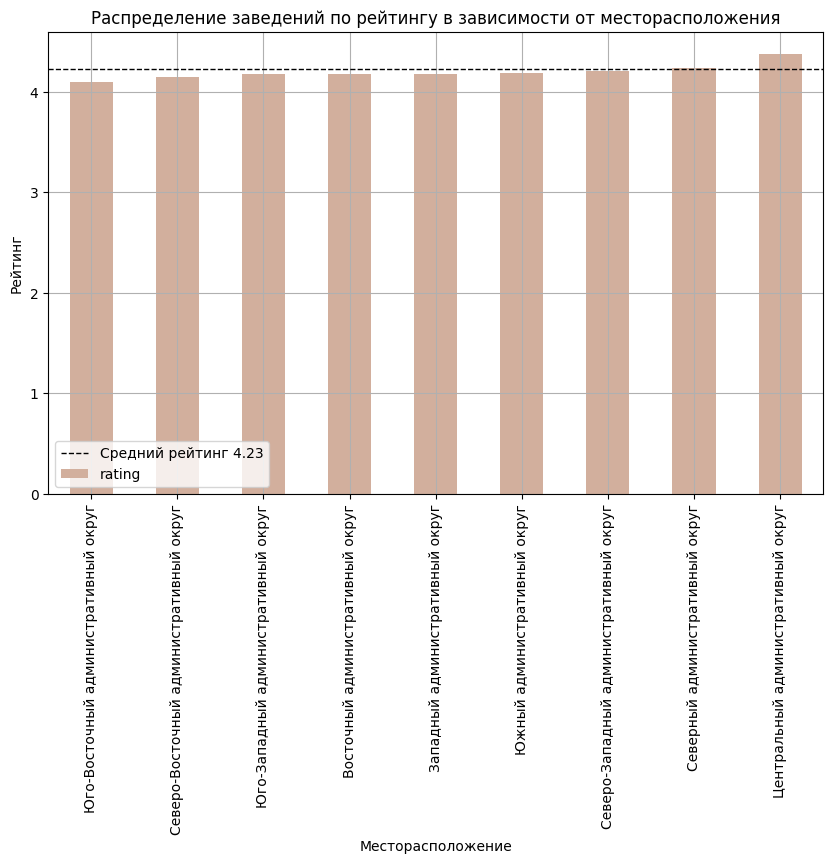

In [69]:
# Строим столбчатую диаграмму
grouped = merged_df.groupby('district')['rating'].mean().sort_values(ascending = True)
grouped.plot(kind='bar',
               title=f'Распределение заведений по рейтингу в зависимости от месторасположения',
               legend=True,
               ylabel='Рейтинг',
               xlabel='Месторасположение',
               rot=90,
               color = '#d2af9d',
               figsize=(10, 6))

# Рассчитываем среднее значение рейтинга по всем заведениям Москвы
mean_rating = merged_df['rating'].mean()

# Наносим на график линию с средним значением рейтинга по всем заведениям Москвы
plt.axhline(mean_rating, # Данные, по которым строится линия
            color='black',
            linestyle='--',
            linewidth=1,
            label=f'Средний рейтинг {round(mean_rating,2)}')

plt.grid()
plt.legend()

# Выводим график
plt.show()

<font color='#777778'>Рейтинг заведений, расположенных в центре несколько выше среднего значения по Москве. В остальных районах Москвы рейтинг заведений примерно на уровне среднего значения и только в Юго-Восточном районе Москвы значение рейтинга меньше среднего значения.

<font color='#777778'>На основании полученных данных можно заключить, что среди заведений, расположенных в центре Москвы высокая конкруенция и более высокие стандарты обслуживания, обуславливающие самую высокую среднюю оценку среди всей выборки.

---

### Промежуточный вывод

<font color='#777778'>В ходе исследования былли выявлено следующее:

- Из представленных восьми категорий заведений наиболее распространнеными в Москве являются заведения типа `кафе` (почти 29%), а также `ресторан` (около 24%) и `кофейня`(почти 17%). Наименее распространенные форматы - `столовая`, `булочная`(на них суммарно приходится около 6% всех заведений);
- Распределение заведений по районам Москвы показало, что больше всего заведений сосредоточено в Центральном административном округе (около 30%). Меньше всего заведений в Северо-Западном административном округе (около 5%).Преобладающей категорией заведения в Центральном административном округе являются `ресторан`, `кафе`, `кофейня`, `бар, паб`;
- Количество несетевых заведений значительно превышает количество сетевых в Москве (61,88% к 38,12%). Небольшое преобладание сетевых заведений наблюдается в таких категориях как `булочная`, `кофейня`, `пиццерия`. При этом преобладание сетевых заведений над несетевыми незначительное. Заметна выраженная тенденция к преобладанию несетевых заведений в других категориях. Особенно заметен разрыв для таких категорий как `кафе`, `ресторан`, `бар, паб`;
- Распределение количества посадочных мест неравномерное и зависит от категории заведения. Так наибольшее количество посадочных мест соответствует таким типам заведений как `ресторан` и `кофейня`, что может быть обусловлено наличием банкетным залов и тенденцией к использованию кофеен в качестве ко-воркинга. Для булочных и заведений быстрого питания наиболее типичным является отсутствие посадочных мест, что может быть связано с их небольшой площадью и ориентацией на приготовление еды и напитков "на вынос";
- Средний рейтинг для всех заведений Москвы составляет - 4,23. Значения среднего рейтинга внутри различных категорий заведений различаются незначительно. Рейтинг выше среднего по Москве у таких категорий как `бар,паб`,`булочная`, `кофейня`, `пиццерия`,`ресторан`. Самый низкий рейтинг в рамках категории заведений у заведений типа `быстрое питание`;
- Наибольшую корреляцию рейтинг заведения показал с его ценовой категорией, месторасположением и типом заведения. Таким образом, чем выше ценовой сегмент заведения, тем выше его средний рейтинг;
- Самая распространенная сеть заведений общественного питания в Москве - **`"Шоколадница"`** (119 заведений). Самая распространённая категория заведений из топ-15 - `кофейня`. Такие заведения составляют треть от всех, представленных в топ-15. Такая статистика может говорить о том, что владельцы кофеен чаще всего продают франшизу для развития своего бизнеса, а также о том, что заведения данного типа требуют меньше всего капиталовложений при открытия новой точки и поэтому имеют такое широкое распространение;
- Для всех районов Москвы наблюдается выраженная тенденция к уменьшению количества заведений в каждом рассматриваемом диапазоне цен по мере увеличения размера среднего чека. Удаленность от центра влиает на снижение уровня цен в заведениях общественного питания;
- Существует тенденция к увеличению средней стоимости чашки кофе в зависимости от типа заведения. В кафе, заведении быстрого питания или в пиццерии чашка кофе в среднем обойдется дешевле чем в кофейне или в баре/пабе. </font>

## 4. Итоговый вывод и рекомендации

<font color='#777778'>В ходе исследования был изучен массив данных о заведениях общественного питания Москвы. Для корректности работы была проведена предобработка данных: исследованы типы данных, пропуски, наличие дубликатов. В ходе исследования были исследованы такие признаки заведения как: его тип, ценовая категория, принадлежность к сети, месторасположение, часы работы, размер среднего чека, средняя стоимость чашки кофе.

<font color='#777778'>Основные выводы по результатам работы:

<font color='#777778'>Из представленных восьми категорий заведений наиболее распространнеными в Москве являются заведения типа `кафе`, `ресторан` и `кофейня`. Наименее распространенные форматы - `столовая`, `булочная`;
- Распределение заведений по районам Москвы показало, что больше всего заведений сосредоточено в Центральном административном округе. Меньше всего заведений в Северо-Западном административном округе.Преобладающей категорией заведения в Центральном административном округе являются `ресторан`, `кафе`, `кофейня`, `бар, паб`;
- Количество несетевых заведений значительно превышает количество сетевых в Москве. Небольшое преобладание сетевых заведений наблюдается в таких категориях как `булочная`, `кофейня`, `пиццерия`. Заметна выраженная тенденция к преобладанию несетевых заведений в других категориях. Особенно заметен разрыв для таких категорий как `кафе`, `ресторан`, `бар, паб`;
- Распределение количества посадочных мест неравномерное и зависит от категории заведения. Наибольшее количество посадочных мест соответствует таким типам заведений как `ресторан` и `кофейня`, что может быть обусловлено наличием банкетным залов и тенденцией к использованию кофеен в качестве ко-воркинга. Для булочных и заведений быстрого питания наиболее типичным является отсутствие посадочных мест, что может быть связано с их небольшой площадью и ориентацией на приготовление еды и напитков "на вынос";
- Средний рейтинг для всех заведений Москвы составляет - 4,23. Значения среднего рейтинга внутри различных категорий заведений различаются незначительно. Рейтинг выше среднего по Москве у таких категорий как `бар,паб`,`булочная`, `кофейня`, `пиццерия`,`ресторан`. Самый низкий рейтинг в рамках категории заведений у заведений типа `быстрое питание`;
- Наибольшую корреляцию рейтинг заведения показал с его ценовой категорией, месторасположением и типом заведения. Таким образом, чем выше ценовой сегмент заведения, тем выше его средний рейтинг;
- Самая распространенная сеть заведений общественного питания в Москве - **`"Шоколадница"`** (119 заведений). Самая распространённая категория заведений из топ-15 - `кофейня`. Такие заведения составляют треть от всех, представленных в топ-15. Такая статистика может говорить о том, что владельцы кофеен чаще всего продают франшизу для развития своего бизнеса, а также о том, что заведения данного типа требуют меньше всего капиталовложений при открытия новой точки и поэтому имеют такое широкое распространение;
- Для всех районов Москвы наблюдается выраженная тенденция к уменьшению количества заведений в каждом рассматриваемом диапазоне цен по мере увеличения размера среднего чека. Удаленность от центра влиает на снижение уровня цен в заведениях общественного питания;
- Существует тенденция к увеличению средней стоимости чашки кофе в зависимости от типа заведения. В кафе, заведении быстрого питания или в пиццерии чашка кофе в среднем обойдется дешевле чем в кофейне или в баре/пабе.</font>

<font color='#777778'>На основании полученных результатов можно дать следующие рекоммендации:

- Поскольку 27% всех заведений общественного питания расположены в Центральном административном округе Москвы, мы рекоммендуем рассмотреть соседние районы для открытия нового заведения. Во-первых, это позволит уменьшить конкуренцию, а также сэкономить на аренде помещения. Например, в Западном административном округе в 2,5 раза меньше заведений. При этом разрыв между значениями среднего чека с центром Москвы минимальный из всех рассматриваемых районов - 138 рублей;
- В случае если расмматривать центр Москвы, стоит отдать предпочтение мало распространенным форматам заведений таким как столовая или, например, булочная. В центре Москвы всего 50 заведений формата `булочная` против 428 формата `кофейня`. Таким образом, при построении концепции заведения можно сделать упор на десерты и выпечку, но при этом продавать кофе, как сопутствующий товар;
- В Москве более 5000 заведений (около 62%) являются несетевыми. С одной стороны это говорит о том, что рынок не монополизирован, а значит, открыться новому независимому заведению достаточно просто. С другой стороны это свидительствует о повышенной конкуренции. Поэтому при открытии нового заведения опять же стоит выбирать район Москвы, где количество заведений не так велико, как в центре (к примеру Западный, Северный, Южный или Северо-Восточный). Количество заведений в данных районах примерно одинаково и в 2,5 раза меньше чем в центре Москвы;
- Так как определенный формат заведений предполагает наличие посадочных мест, наиболее простым с этой точки зрения станет открытие булочной, которая может распологаться в небольшом помещении не предполагающем наличие посадочных мест. Изучение рынка Москвы показало, что для данного формата заведений наиболее типичным является отсутствие посадочных мест. При этом наиболее типипчное количество посадочных мест для сравнительно похожего формата - кофейни - 100, что делает подбор подходящего помещения более сложным, аренду - затратней;
- Значение среднего рейтинга 4,23 по Москве в целом сигнализиурет о достаточно высокой конкуренции среди заведений общественного питания в целом. При этом для таких категорий, как `бар,паб`,`булочная`, `кофейня`, `пиццерия`,`ресторан` значения рейтинга выше среднего по Москве, что говорит о еще большей конкуренции внутри данных типов заведений. При открытии заведения одного из этих форматов стоит учитывать особенности заведений-конкурентов, чтобы повышать стандарты сервиса и обслуживания и, как следствие, добиваться высокого рейтинга.
- Самый распространенный формат среди сетевых заведений `кофейня`. Среди топ-15 сетей по количеству заведений заведений такого формата - более трети. Сеть заведений данного формата занимает лидирующую позицию как по количеству заведений (`Шоколадница` - ***119*** заведений), так и по значению среднего рейтинга (`Кофемания` - средний рейтинг ***4.46**). При этом зачастую  большое количество заведений говорит о высоких стандартах обслуживания. Так Сети `Кофемания` с 22-мя заведениями удалось добиться наивысшего среднего рейтинга. Мы бы рекоммендовали рассмотреть формат кофейни в случае, если планируется развитие сетевого бизнеса, поскольку открытие заведений данного формата может потребовать сравнительно низкий капиталовложений  на начальном этапе. При этом стоит сделать упор на повышение стандартов обслуживания в уже существующих точках, а не стремиться к открытию новых любой ценой. В противном случае может получиться так, что стандарты обслуживания в заведениях не будут едиными, что может понести за собой репутационные риски.</font>